In [10]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [13]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [14]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [15]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [16]:
import os
for dirname, _, filenames in os.walk('/Users/rahul/Downloads/Week-3-Project/Country-data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
ngo= pd.read_csv(r"/Users/rahul/Downloads/Week-3-Project/Country-data.csv")
ngo.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan          90.2        10.0     7.58    44.9     1610     
1  Albania              16.6        28.0     6.55    48.6     9930     
2  Algeria              27.3        38.4     4.17    31.4     12900    
3  Angola               119.0       62.3     2.85    42.9     5900     
4  Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

In [18]:
word=pd.read_csv(r"/Users/rahul/Downloads/Week-3-Project/Country-data.csv")
word.head(len(word))

country  child_mort  exports  health  imports  income  \
0    Afghanistan          90.2        10.0     7.58    44.9     1610     
1    Albania              16.6        28.0     6.55    48.6     9930     
2    Algeria              27.3        38.4     4.17    31.4     12900    
3    Angola               119.0       62.3     2.85    42.9     5900     
4    Antigua and Barbuda  10.3        45.5     6.03    58.9     19100    
..                   ...   ...         ...      ...     ...       ...    
162  Vanuatu              29.2        46.6     5.25    52.7     2950     
163  Venezuela            17.1        28.5     4.91    17.6     16500    
164  Vietnam              23.3        72.0     6.84    80.2     4490     
165  Yemen                56.3        30.0     5.18    34.4     4480     
166  Zambia               83.1        37.0     5.89    30.9     3280     

     inflation  life_expec  total_fer   gdpp  
0    9.44       56.2        5.82       553    
1    4.49       76.3        1.65       4090   
2    16.10      76.5        2.89       4460   
3    22.40      60.1        6.16       3530   
4    1.44       76.8        2.13       12200  
..    ...        ...         ...         ...  
162  2.62       63.0        3.50       2970   
163  45.90      75.4        2.47       13500  
164  12.10      73.1        1.95       1310   
165  23.60      67.5        4.67       1310   
166  14.00      52.0        5.40       1460   

[167 rows x 10 columns]

In [19]:
ngo_dub = ngo.copy()

# Checking for duplicates and dropping the entire duplicate row if any
ngo_dub.drop_duplicates(subset=None, inplace=True)


In [20]:
ngo_dub.shape

(167, 10)

In [21]:
ngo.shape

(167, 10)

In [22]:
ngo.shape

(167, 10)

In [23]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [24]:
ngo.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000  167.000000      
mean   38.270060   41.108976   6.815689    46.890215   17144.688623    
std    40.328931   27.412010   2.746837    24.209589   19278.067698    
min    2.600000    0.109000    1.810000    0.065900    609.000000      
25%    8.250000    23.800000   4.920000    30.200000   3355.000000     
50%    19.300000   35.000000   6.320000    43.300000   9960.000000     
75%    62.100000   51.350000   8.600000    58.750000   22800.000000    
max    208.000000  200.000000  17.900000   174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000  167.000000     
mean   7.781832    70.555689   2.947964    12964.155689   
std    10.570704   8.893172    1.513848    18328.704809   
min   -4.210000    32.100000   1.150000    231.000000     
25%    1.810000    65.300000   1.795000    1330.000000    
50%    5.390000    73.100000   2.410000    4660.000000    
75%    10.750000   76.800000   3.880000    14050.000000   
max    104.000000  82.800000   7.490000    105000.000000

In [25]:
(ngo.isnull().sum() * 100 / len(ngo)).value_counts(ascending=False)

0.0    10
dtype: int64

In [26]:
ngo.isnull().sum().value_counts(ascending=False)

0    10
dtype: int64

In [27]:
(ngo.isnull().sum(axis=1) * 100 / len(ngo)).value_counts(ascending=False)

0.0    167
dtype: int64

In [28]:
ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

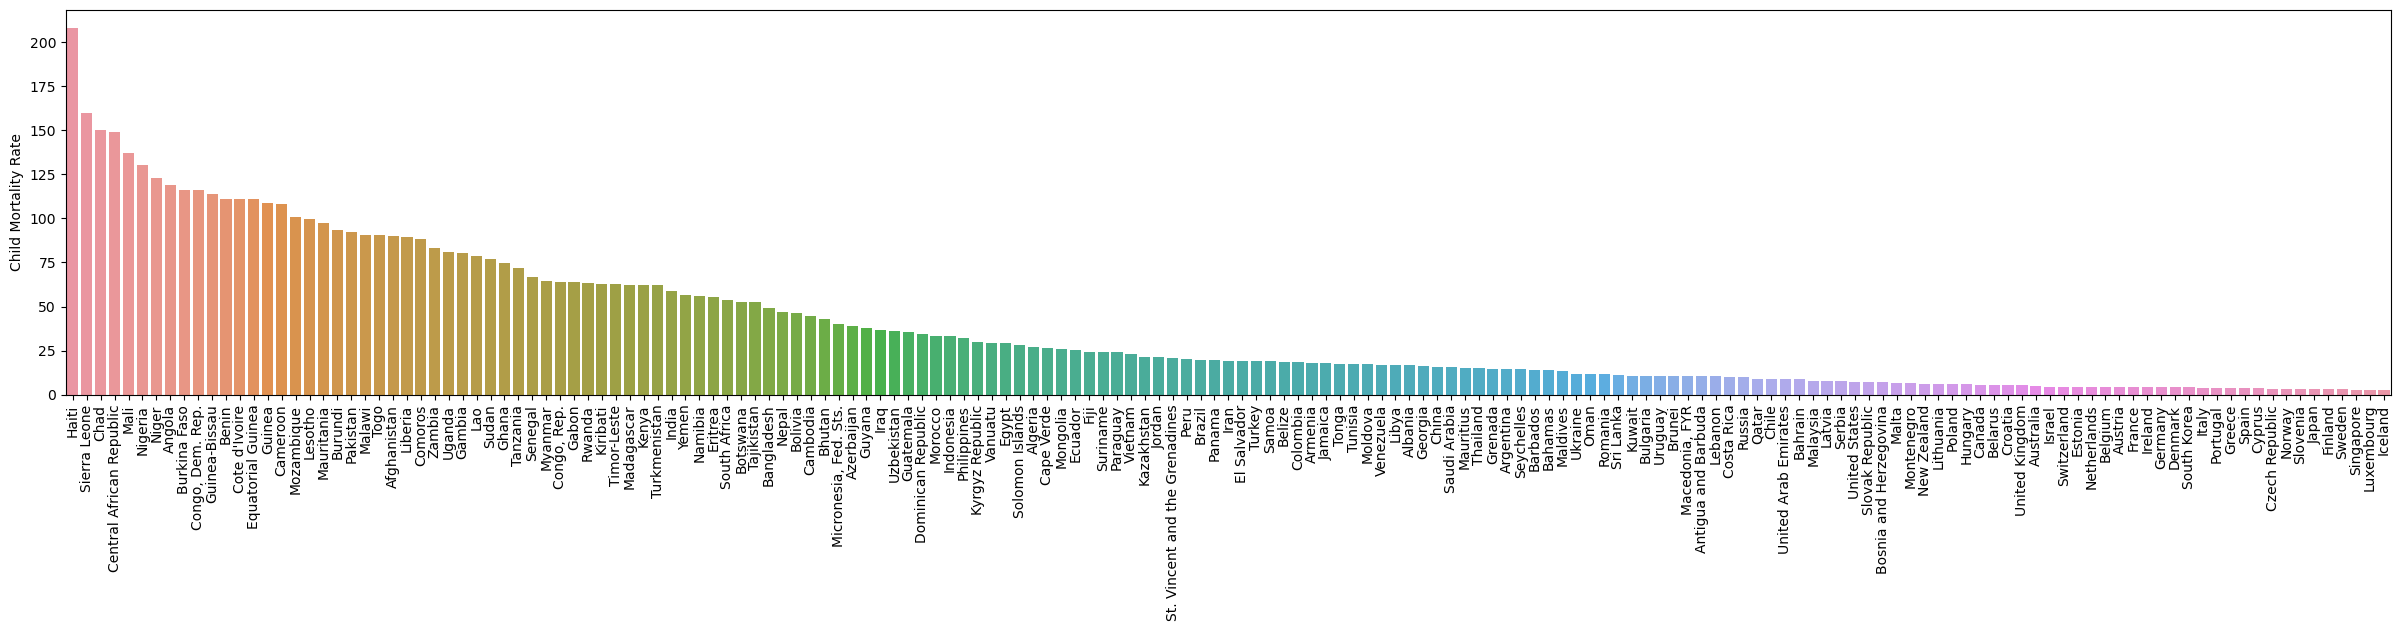

In [29]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

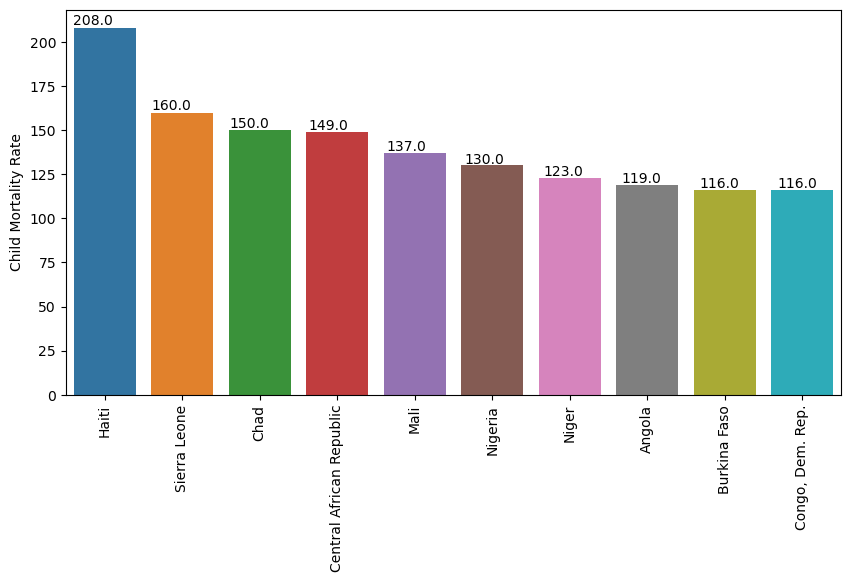

In [30]:
plt.figure(figsize = (10,5))
child_mort_top10 = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

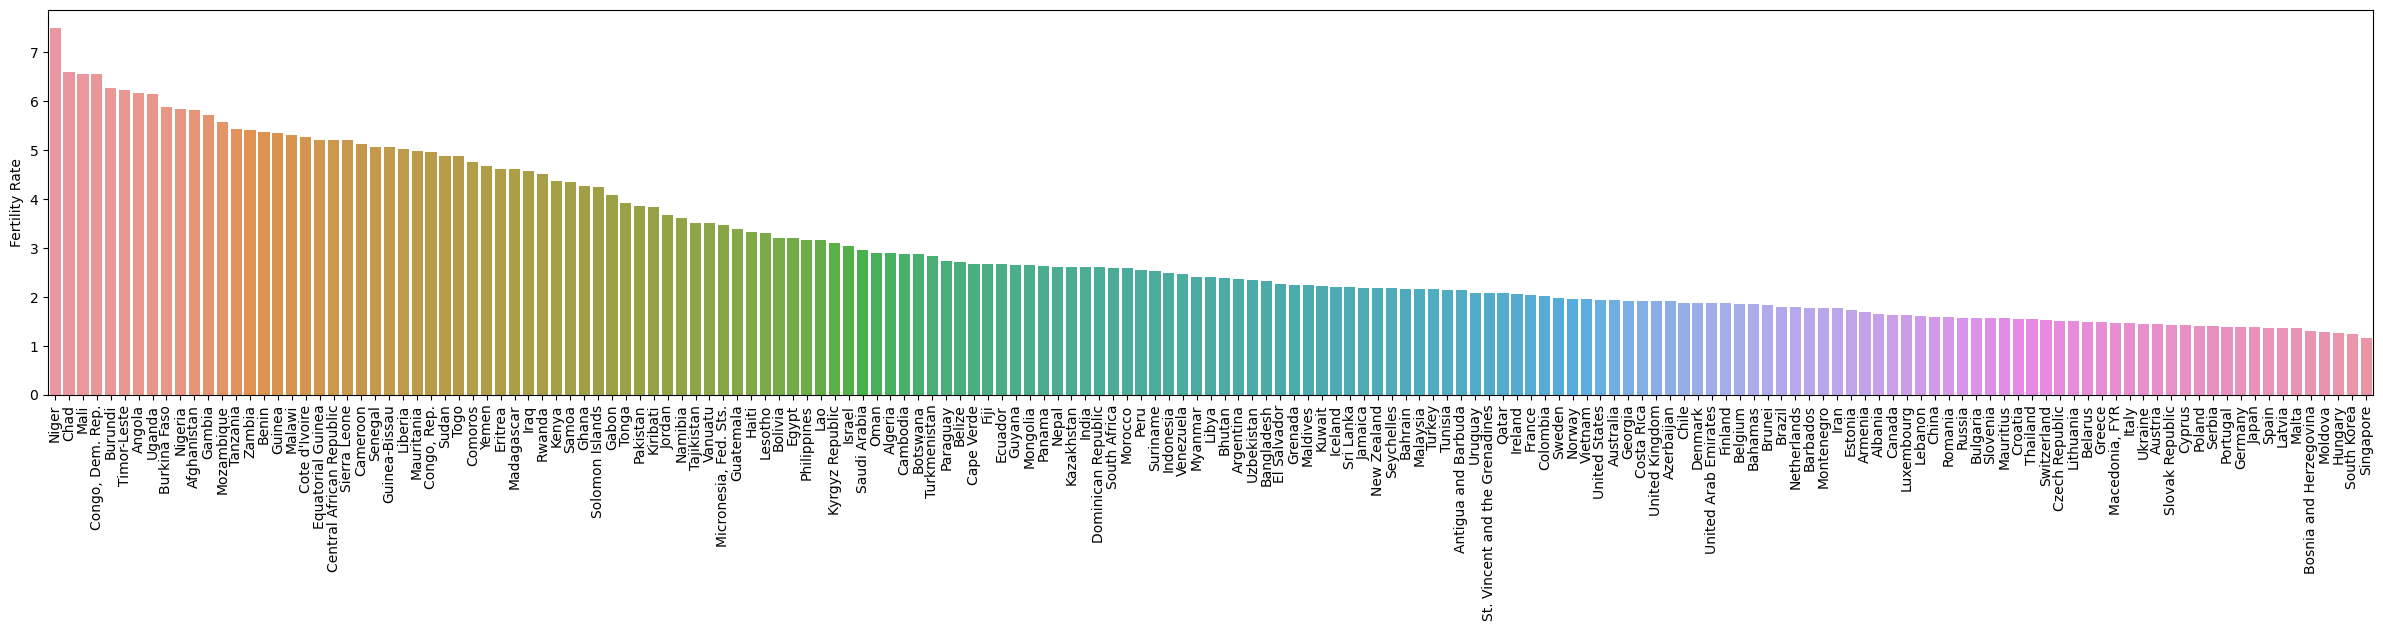

In [31]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()


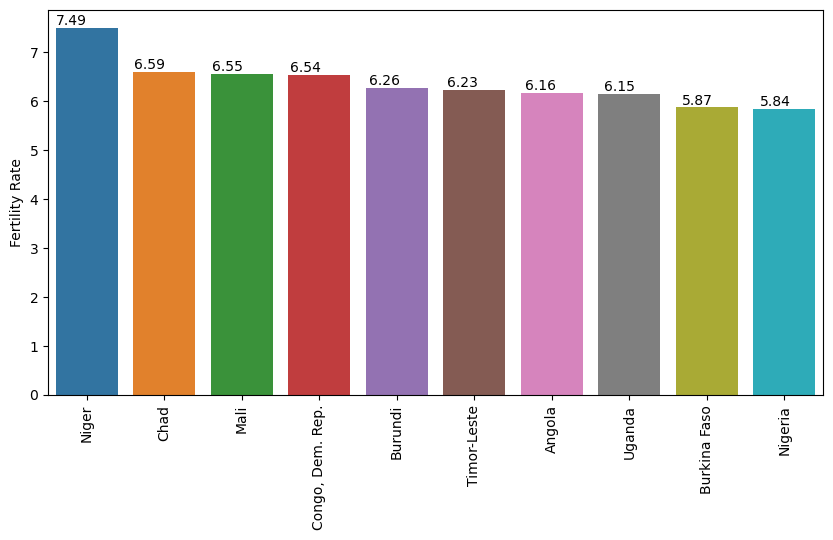

In [32]:
plt.figure(figsize = (10,5))
total_fer_top10 = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

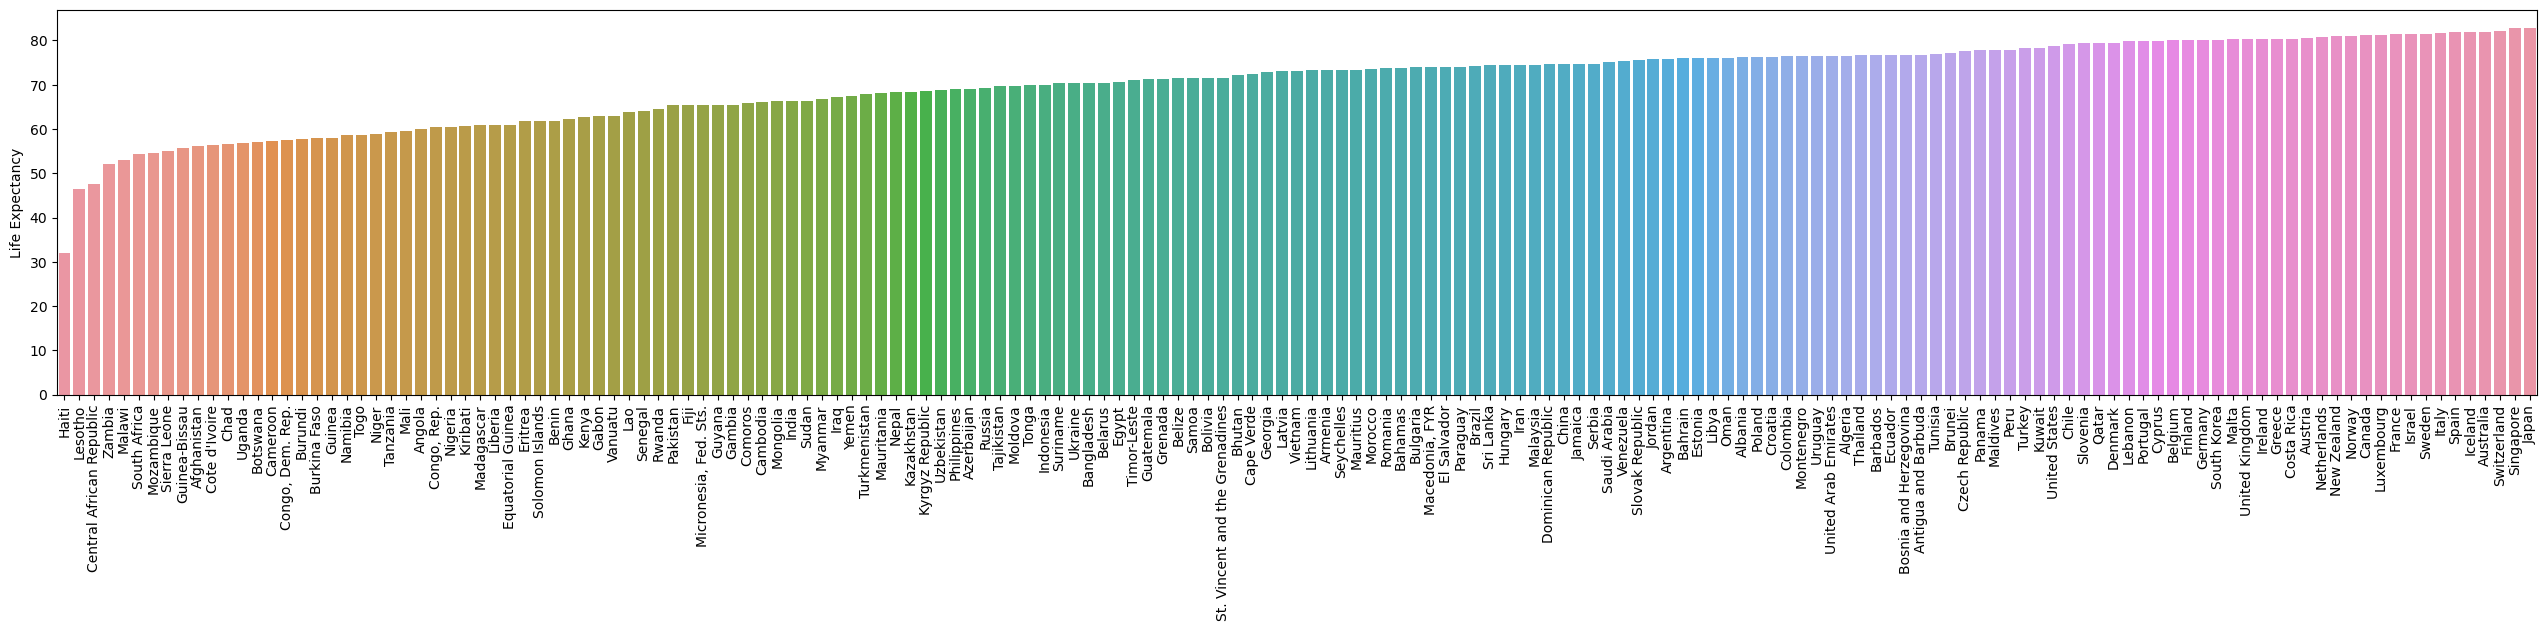

In [33]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

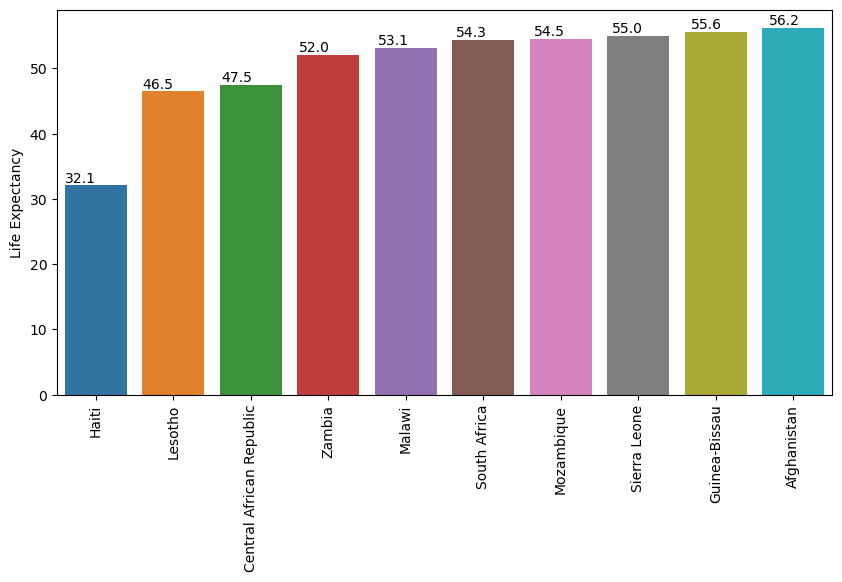

In [34]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

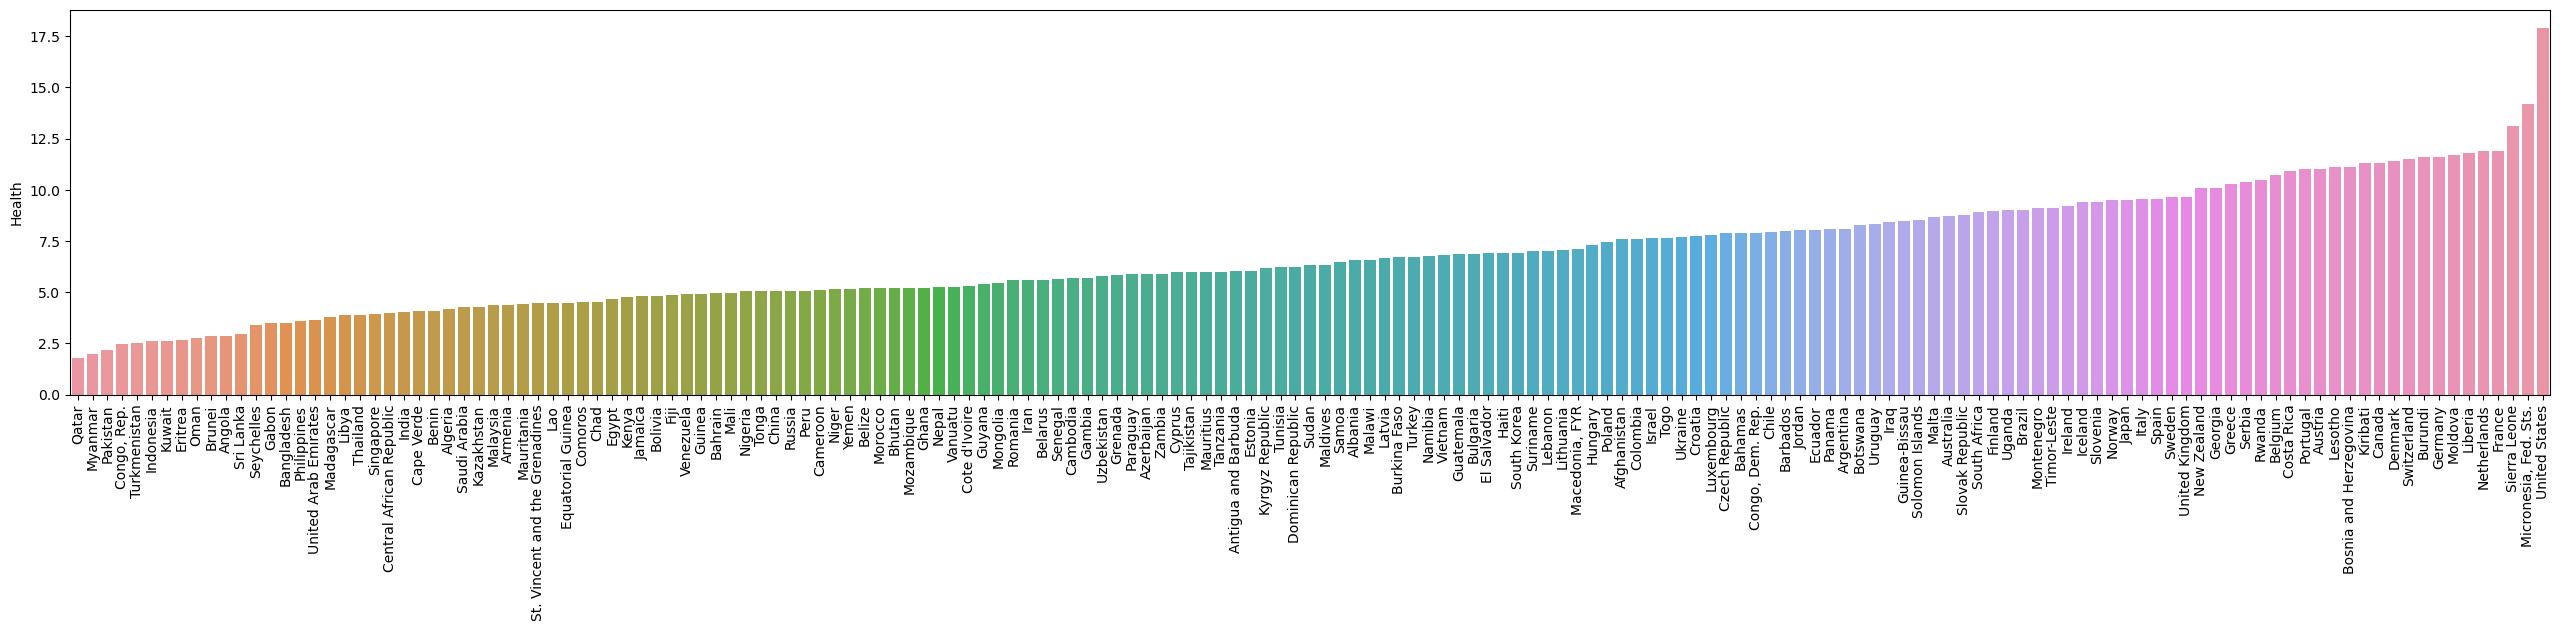

In [35]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = ngo[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

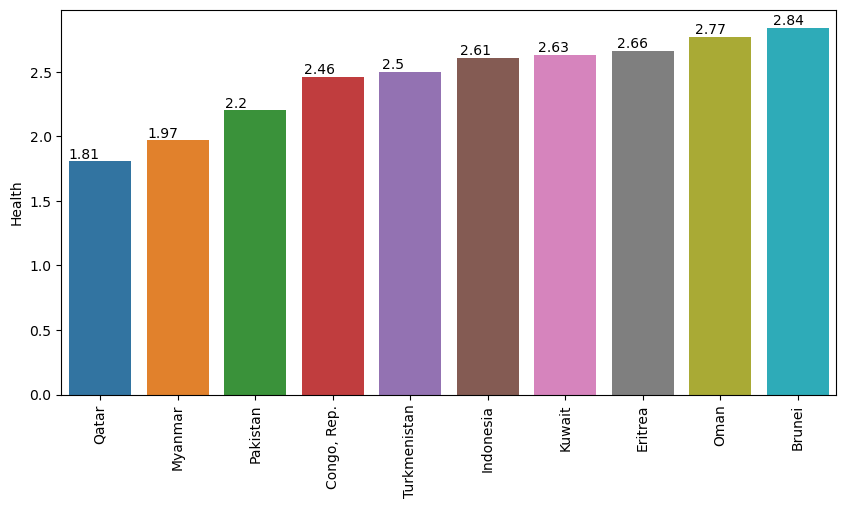

In [36]:
plt.figure(figsize = (10,5))
health_bottom10 = ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

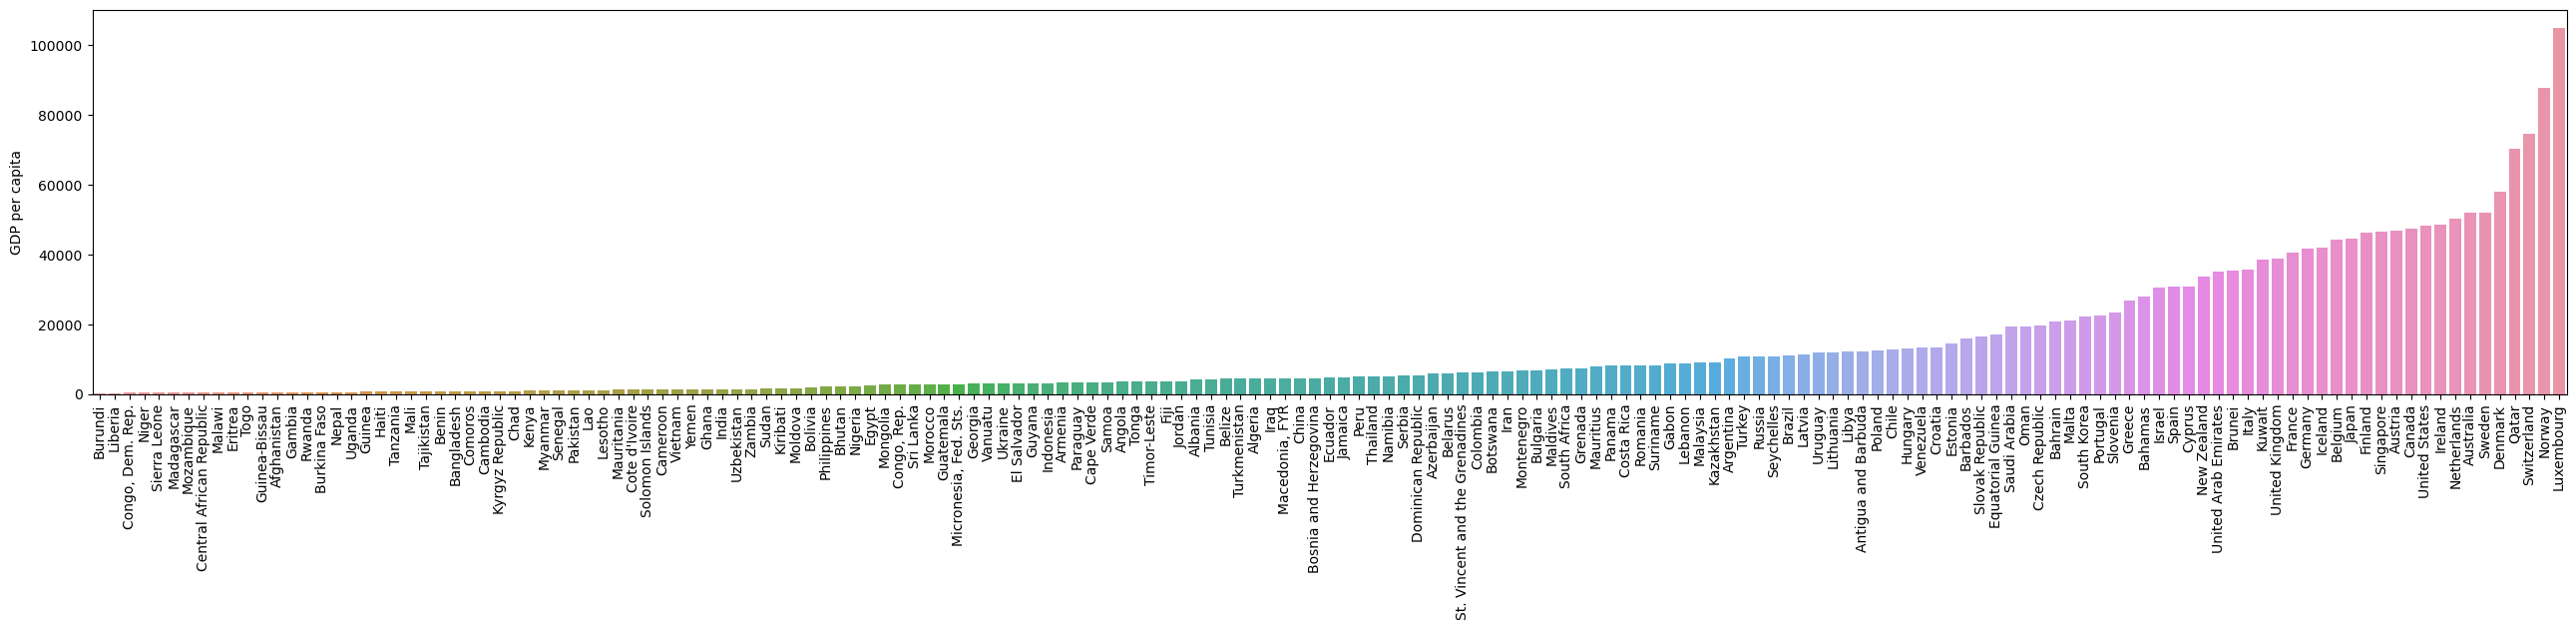

In [37]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

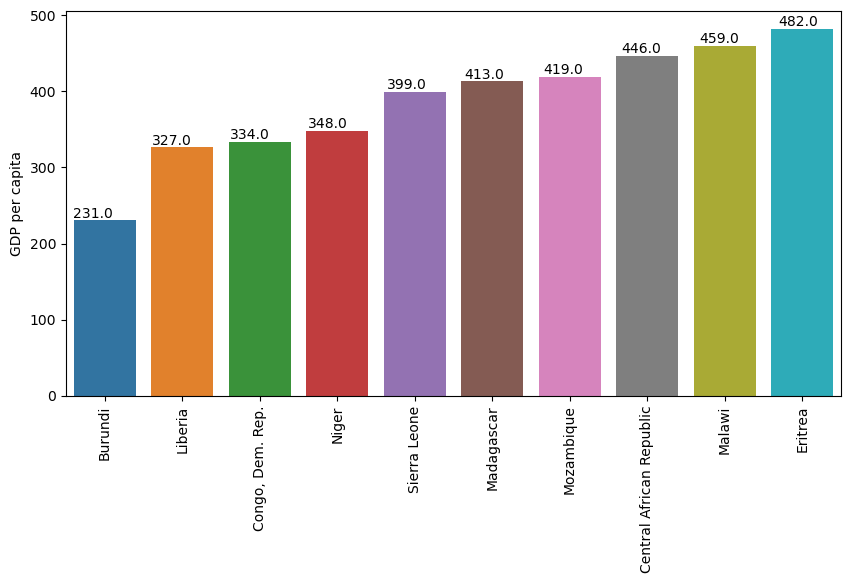

In [38]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

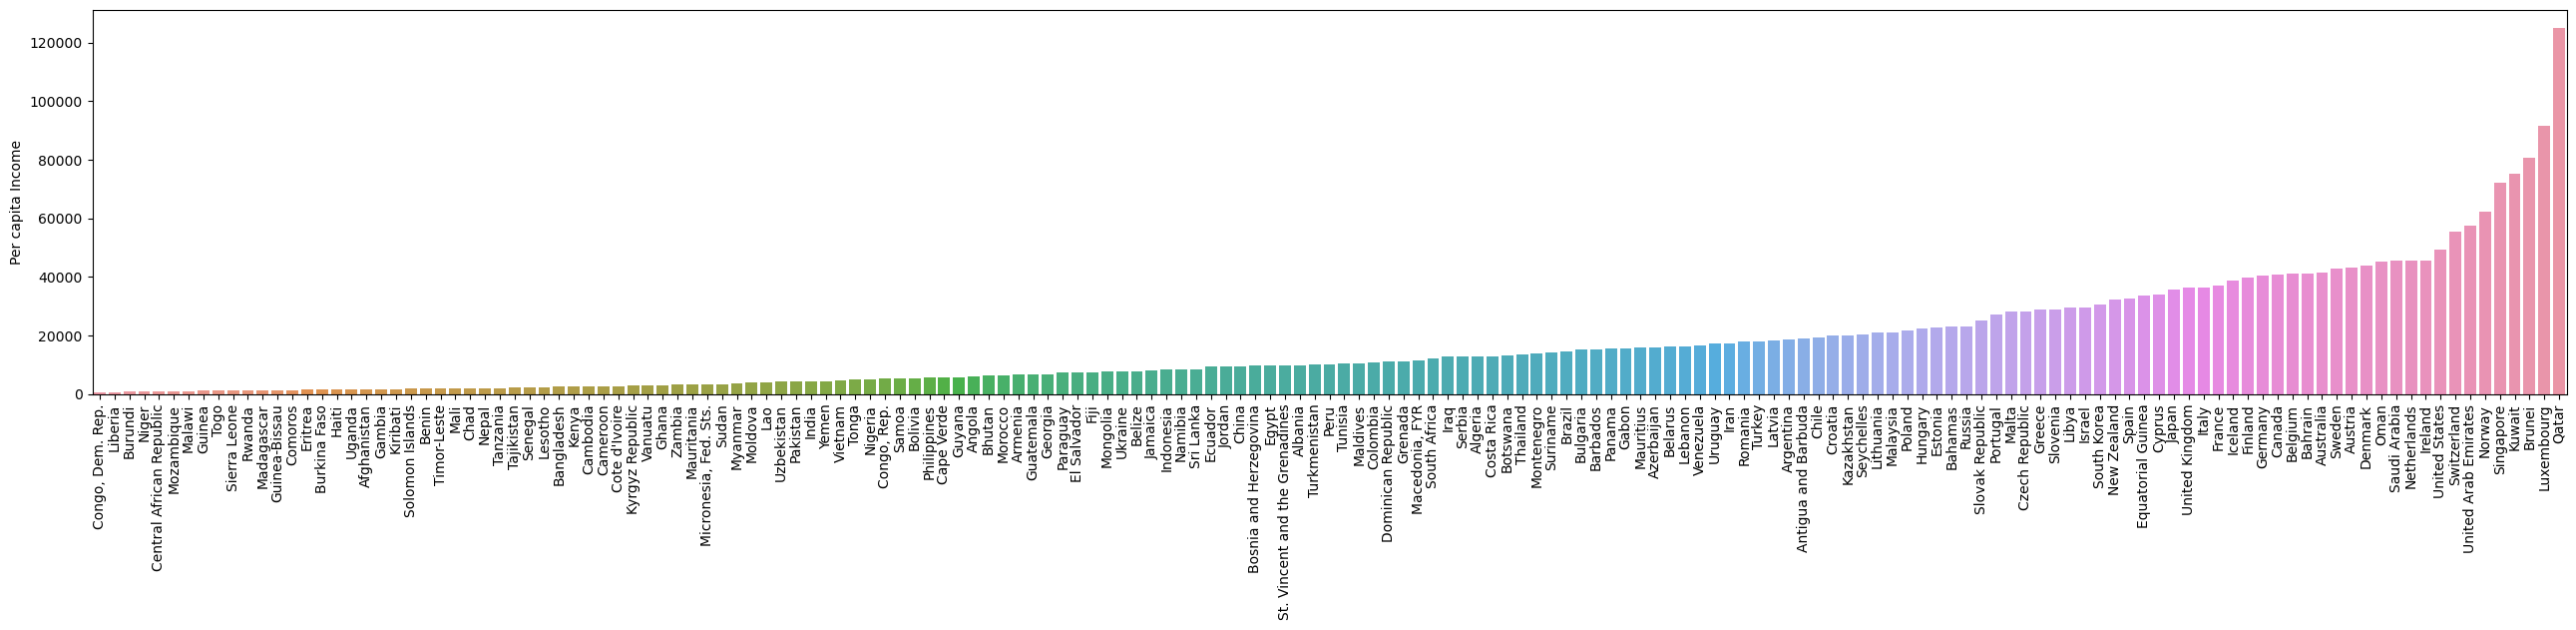

In [39]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

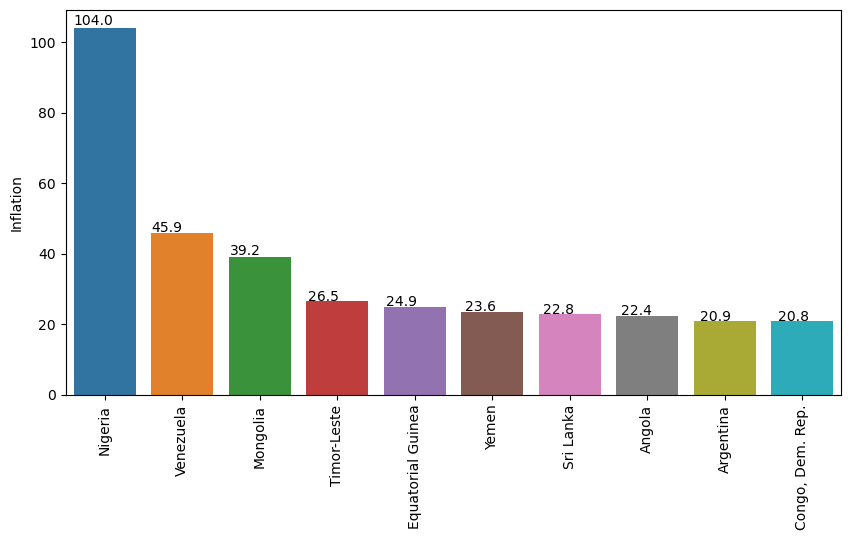

In [40]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

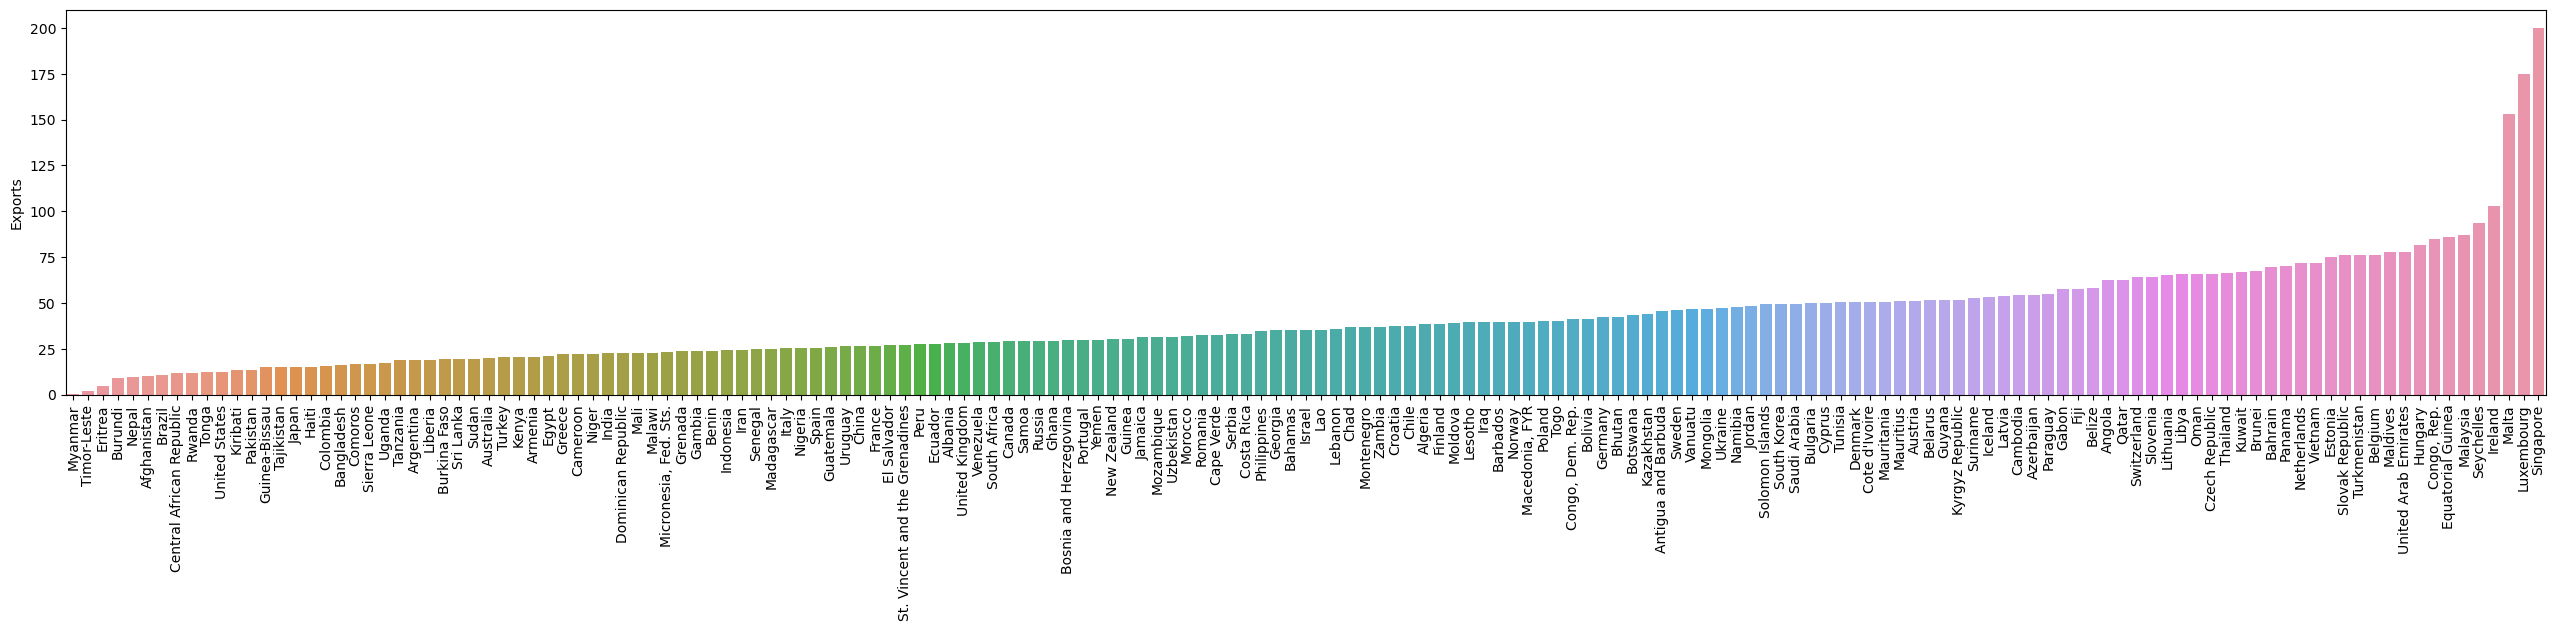

In [41]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

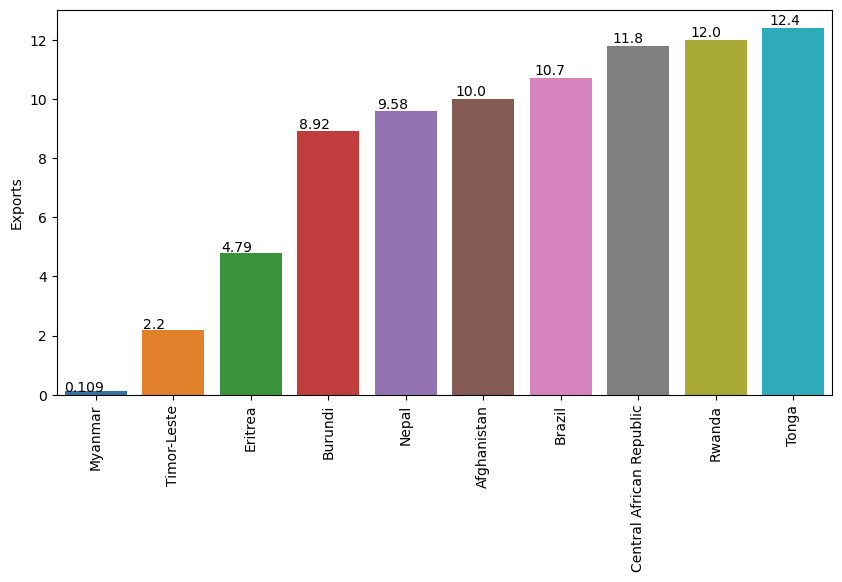

In [42]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

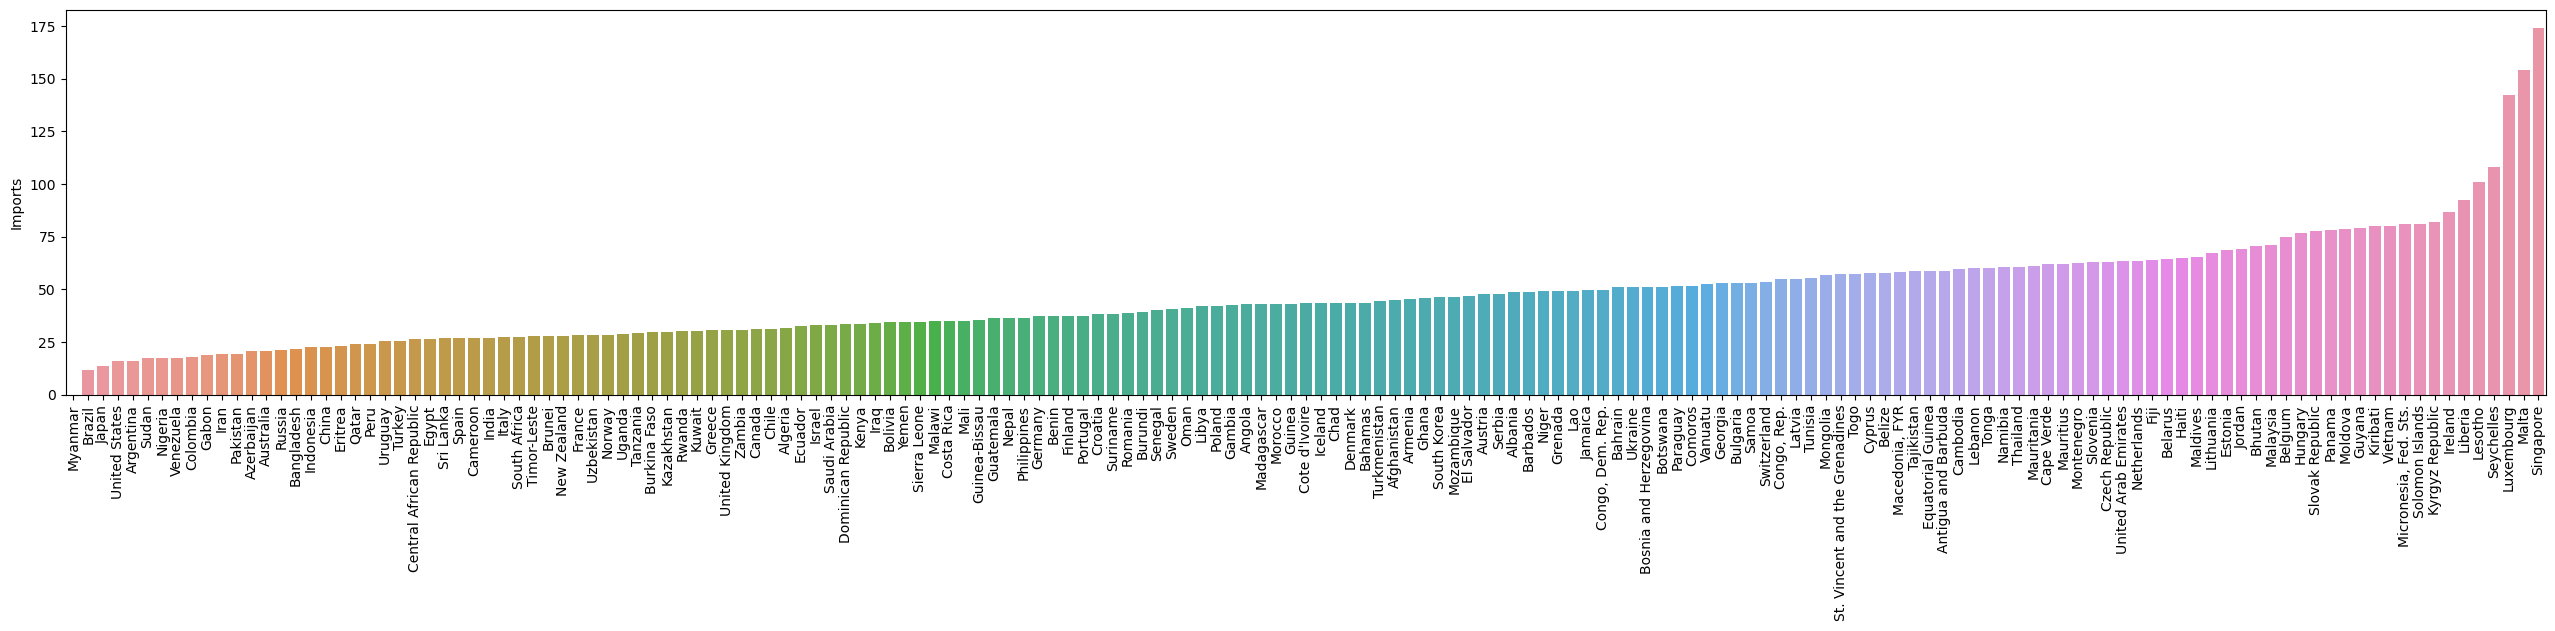

In [43]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

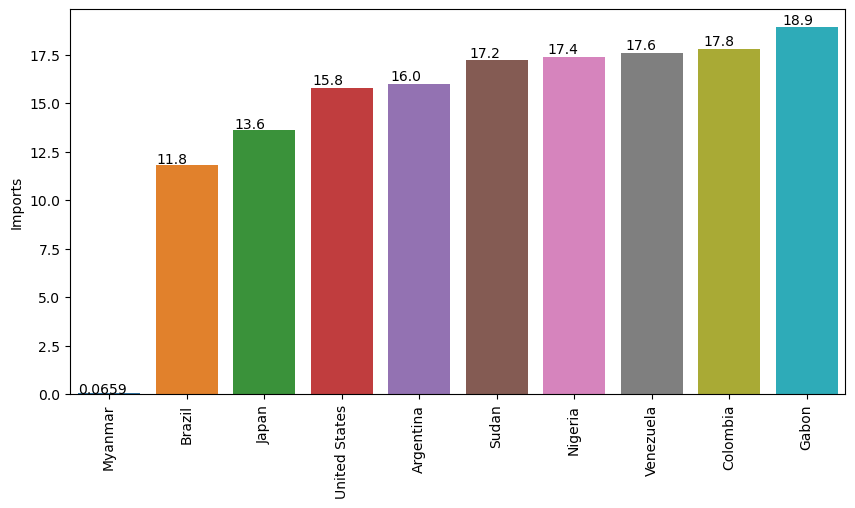

In [44]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

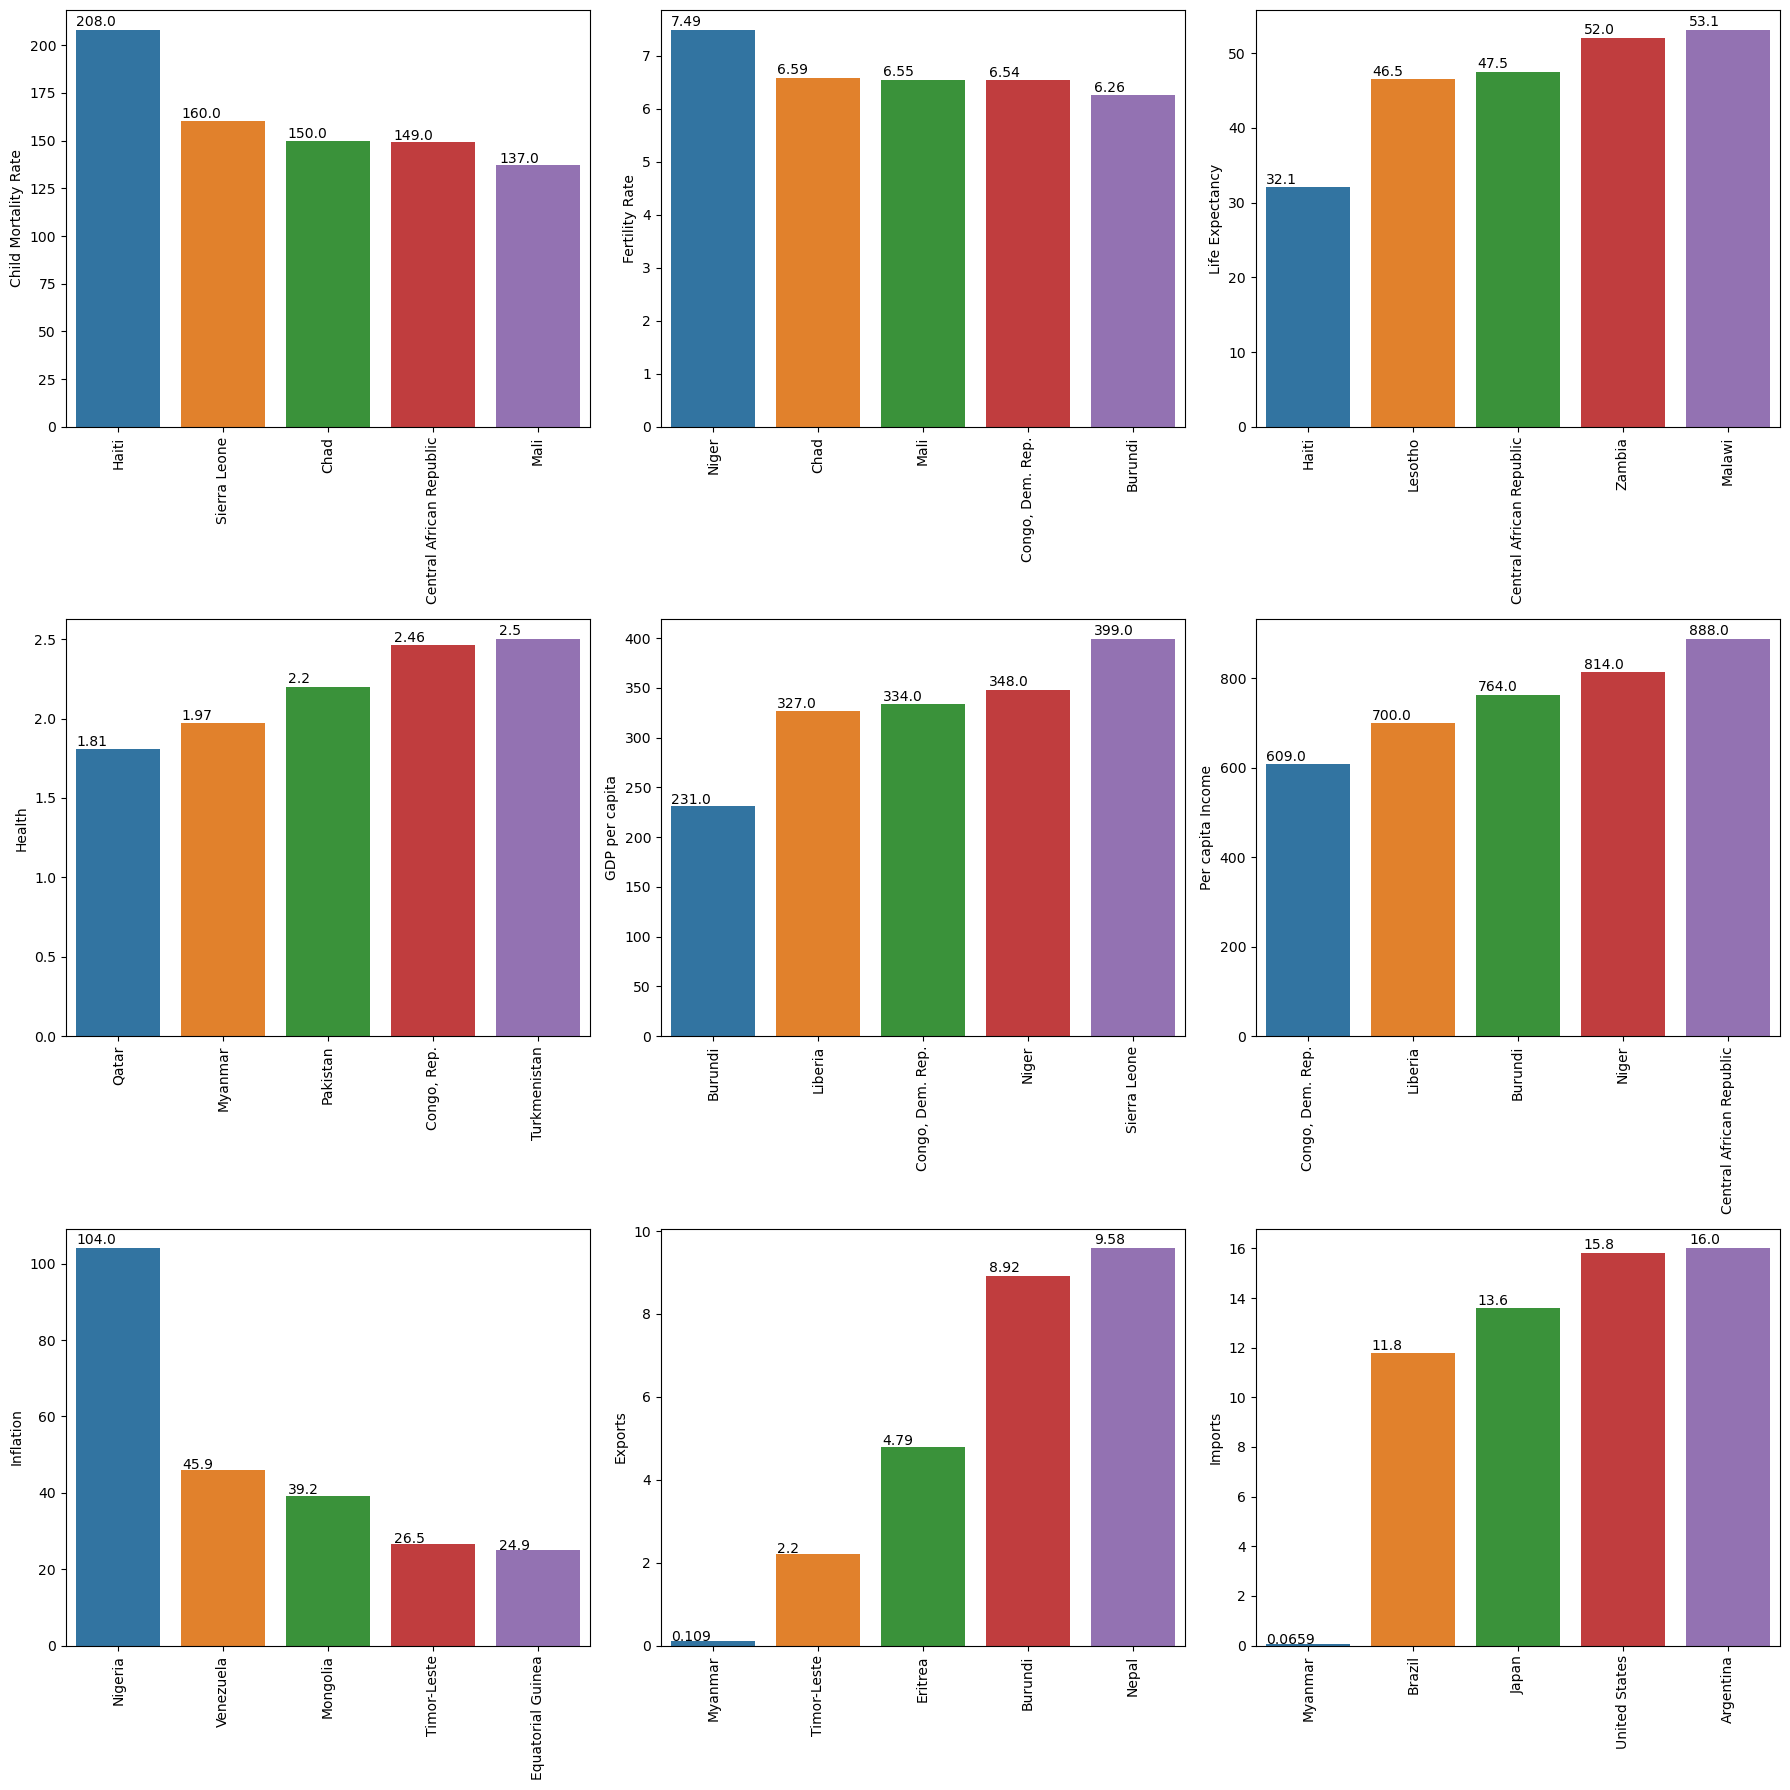

In [45]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

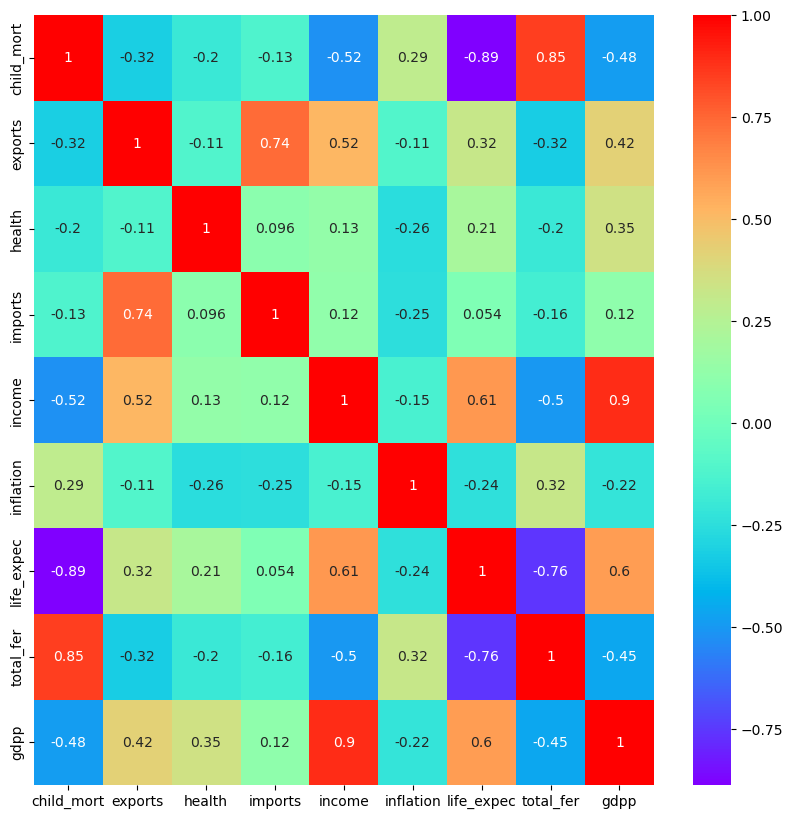

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

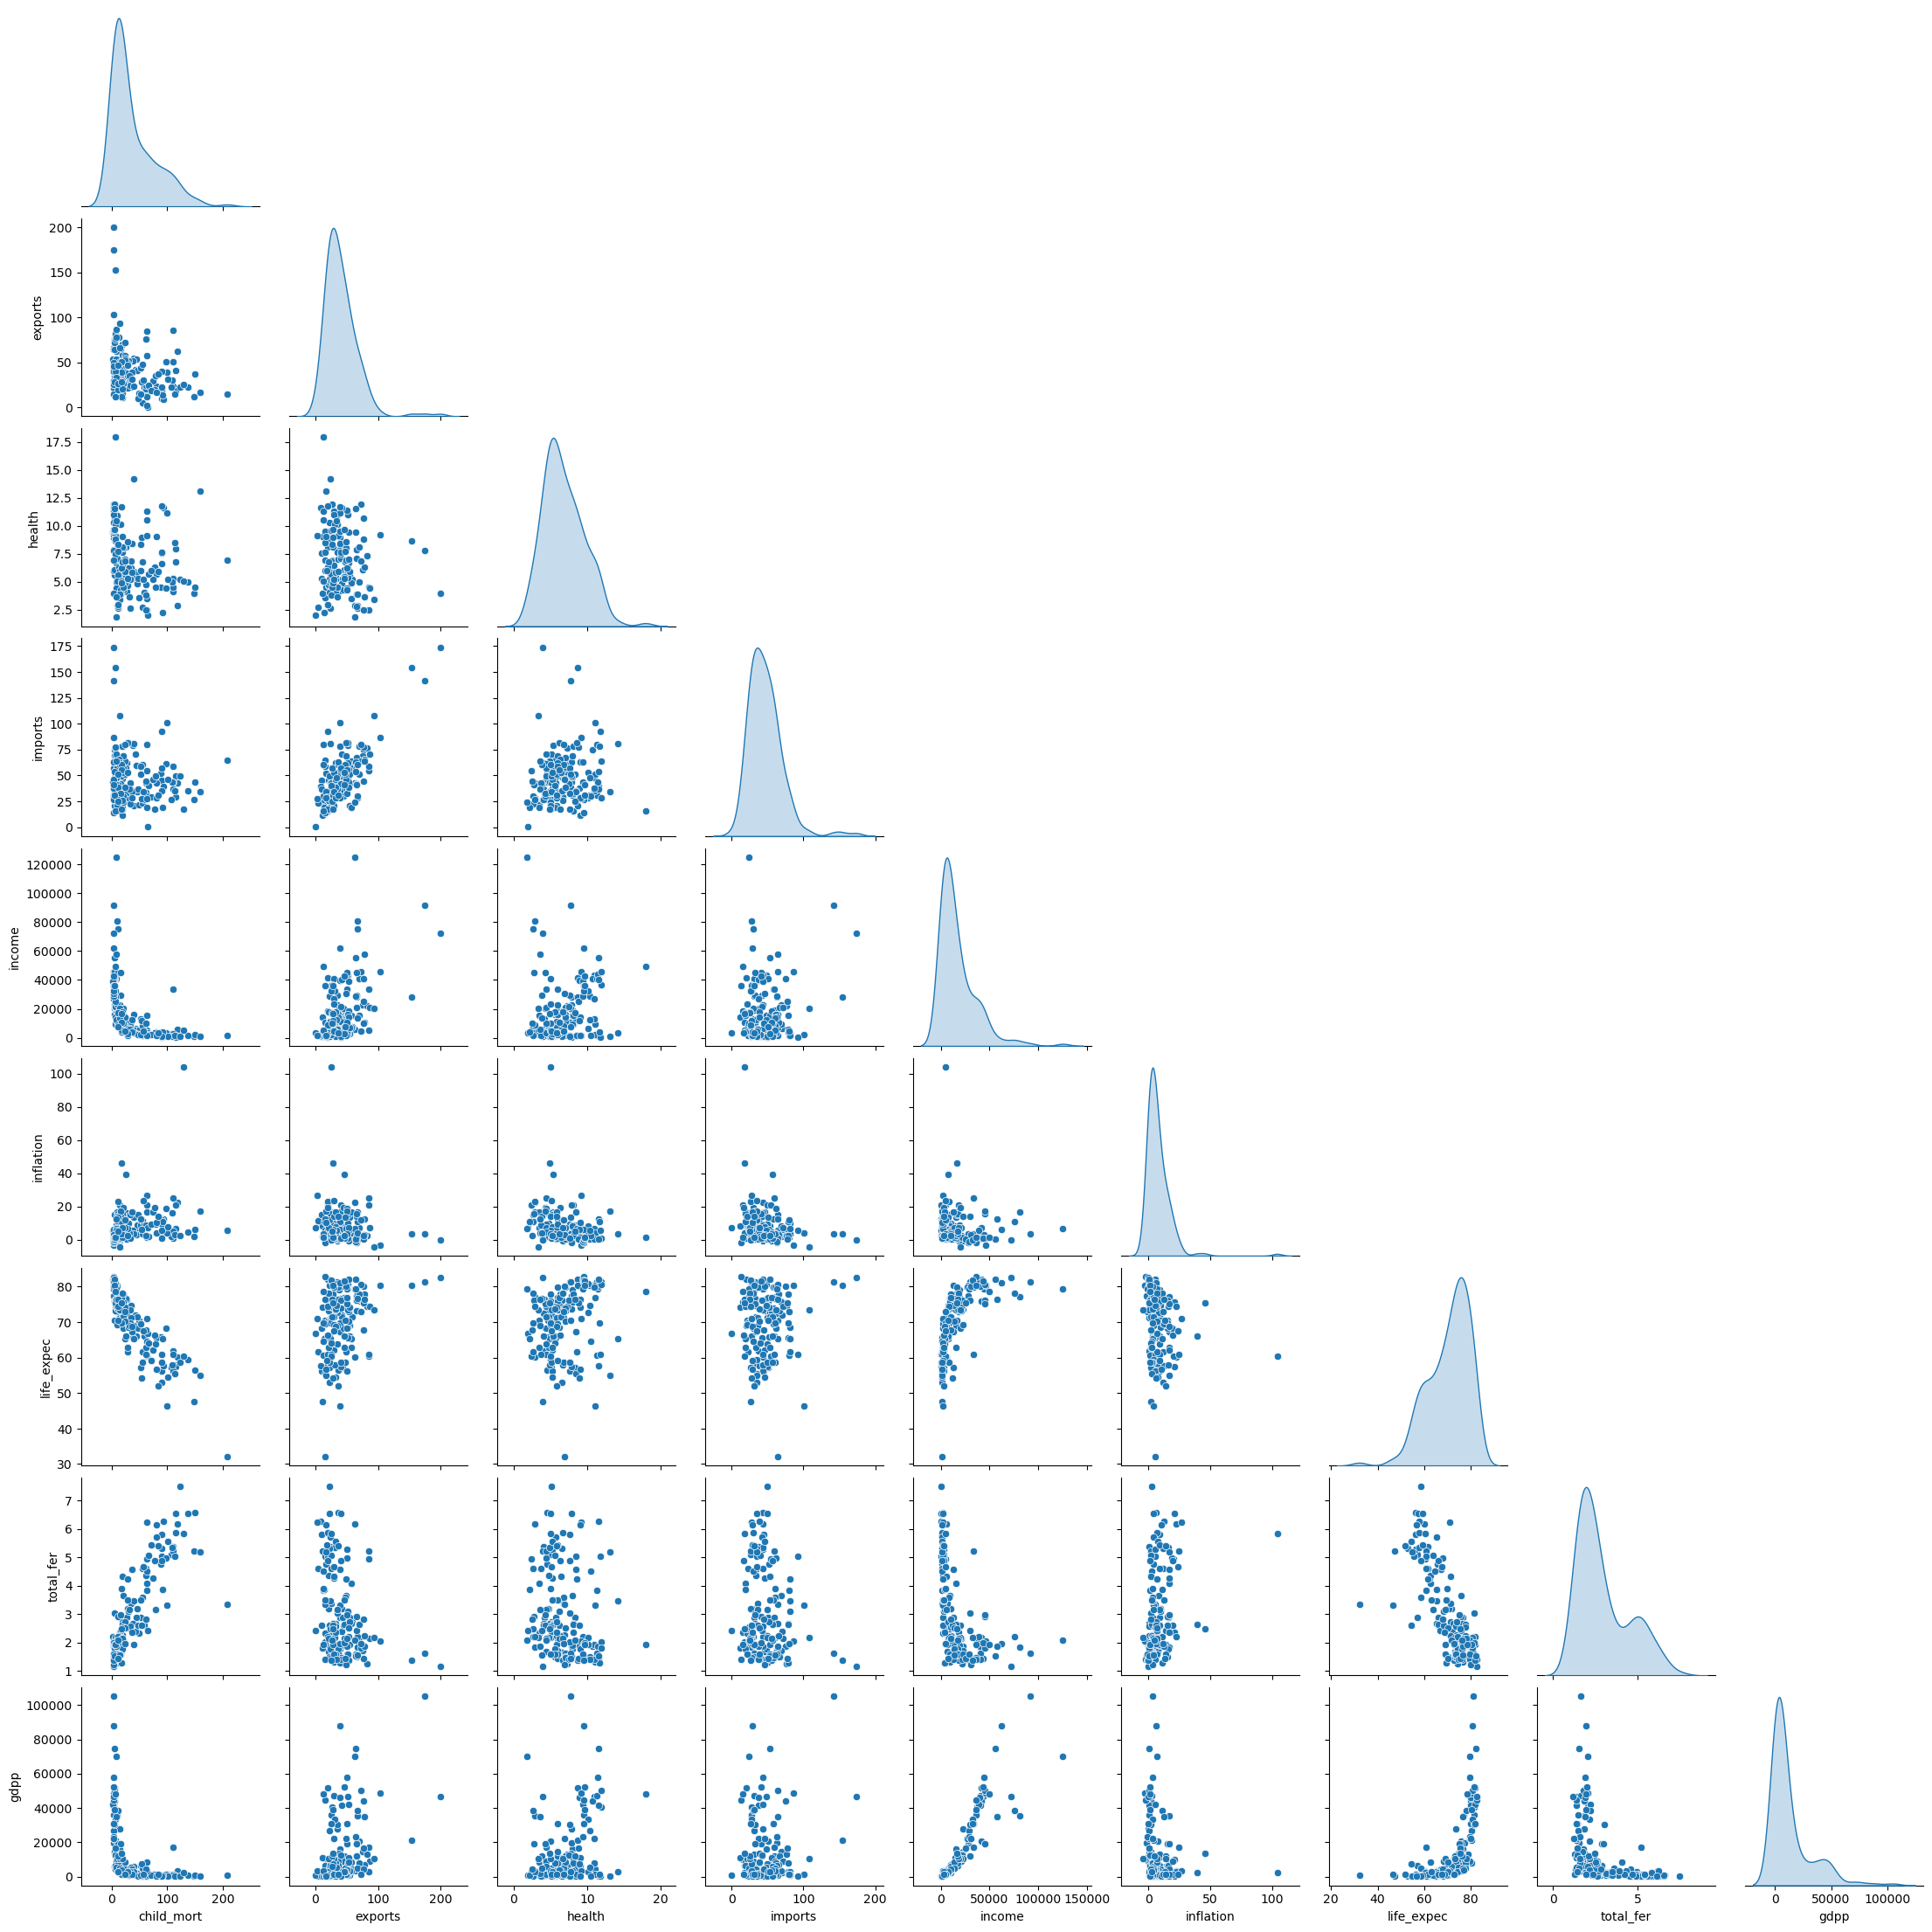

In [47]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

In [48]:
# Converting exports,imports and health spending percentages to absolute values.

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

In [49]:
ngo.head()

country  child_mort  exports    health   imports  income  \
0  Afghanistan          90.2        55.30    41.9174   248.297   1610     
1  Albania              16.6        1145.20  267.8950  1987.740  9930     
2  Algeria              27.3        1712.64  185.9820  1400.440  12900    
3  Angola               119.0       2199.19  100.6050  1514.370  5900     
4  Antigua and Barbuda  10.3        5551.00  735.6600  7185.800  19100    

   inflation  life_expec  total_fer   gdpp  
0  9.44       56.2        5.82       553    
1  4.49       76.3        1.65       4090   
2  16.10      76.5        2.89       4460   
3  22.40      60.1        6.16       3530   
4  1.44       76.8        2.13       12200

In [50]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

In [51]:
ngo_drop.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0  90.2        55.30    41.9174   248.297   1610    9.44       56.2         
1  16.6        1145.20  267.8950  1987.740  9930    4.49       76.3         
2  27.3        1712.64  185.9820  1400.440  12900   16.10      76.5         
3  119.0       2199.19  100.6050  1514.370  5900    22.40      60.1         
4  10.3        5551.00  735.6600  7185.800  19100   1.44       76.8         

   total_fer   gdpp  
0  5.82       553    
1  1.65       4090   
2  2.89       4460   
3  6.16       3530   
4  2.13       12200

In [52]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [53]:
ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [54]:
pca = PCA(svd_solver='randomized', random_state=50)


In [55]:
# Lets apply PCA on the scaled data

pca.fit(ngo_scaled)

PCA(random_state=50, svd_solver='randomized')

In [56]:
# PCA components created 

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [57]:
# Variance Ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

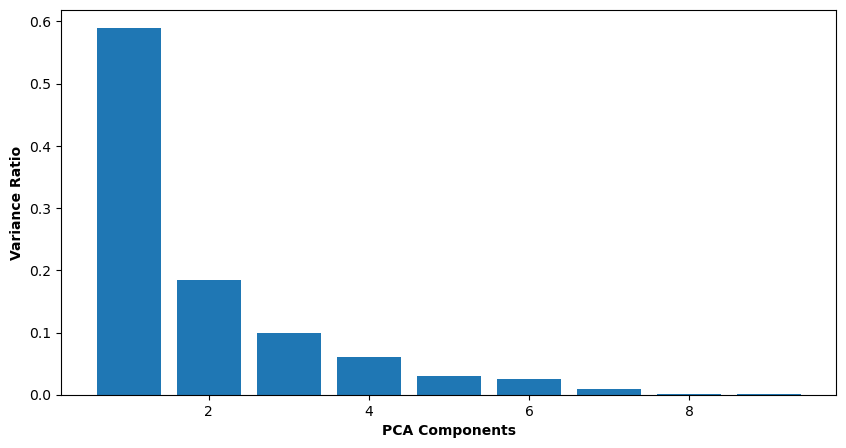

In [58]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

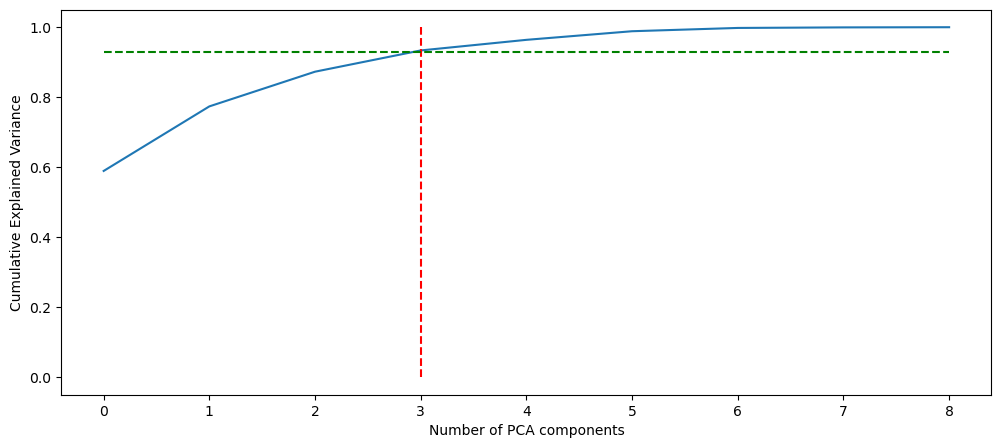

In [59]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [60]:
# Checking which attributes are well explained by the pca components

org_col = list(ngo.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [61]:
attributes_pca

Attribute      PC_1      PC_2      PC_3
0  child_mort -0.316392  0.476267 -0.150012
1  exports     0.342887  0.397311 -0.030574
2  health      0.358535  0.155053 -0.075703
3  imports     0.344865  0.370781 -0.072174
4  income      0.380041  0.128384  0.145764
5  inflation  -0.143085  0.221261  0.948419
6  life_expec  0.343857 -0.369820  0.196752
7  total_fer  -0.302842  0.459715 -0.077834
8  gdpp        0.399988  0.200624  0.010339

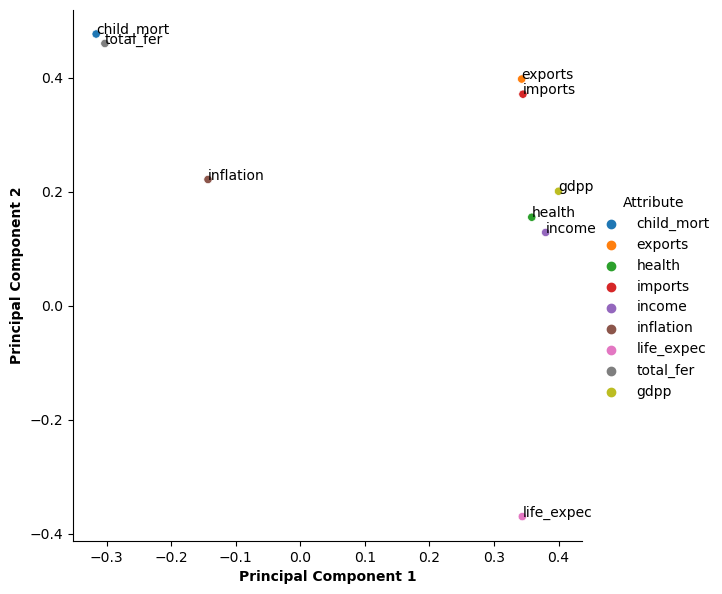

In [62]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=6)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

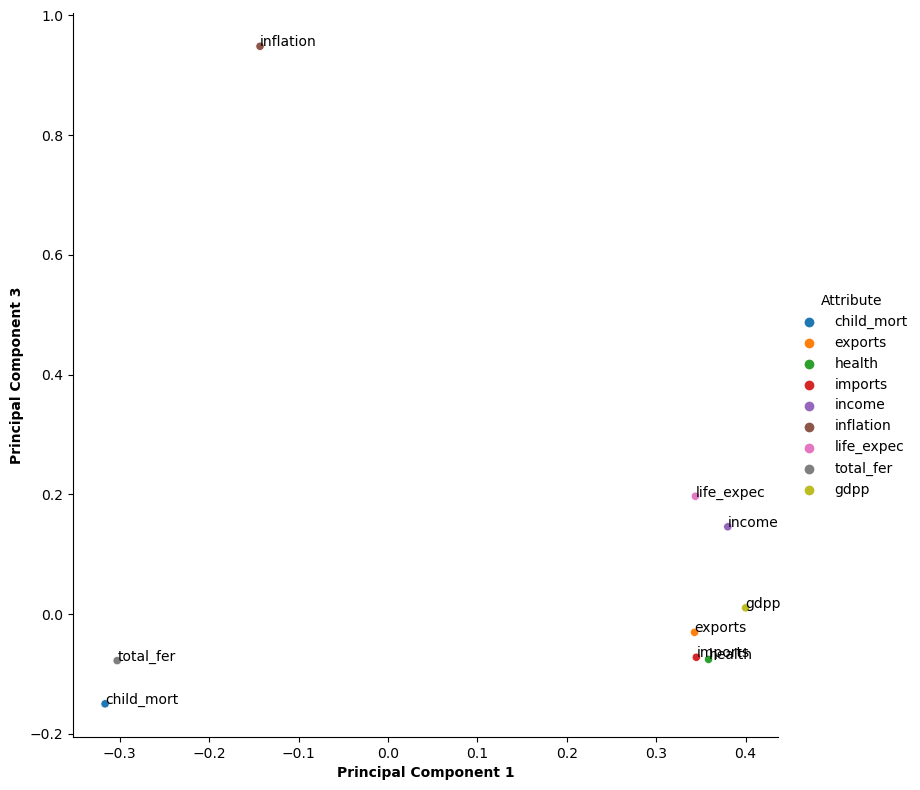

In [63]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

In [64]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [65]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(ngo_scaled)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [66]:
# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

country      PC_1      PC_2      PC_3
0  Afghanistan         -2.637442  1.469038 -0.541359
1  Albania             -0.022277 -1.431896 -0.020701
2  Algeria             -0.457626 -0.673301  0.961867
3  Angola              -2.724520  2.174583  0.606687
4  Antigua and Barbuda  0.649849 -1.024374 -0.250103

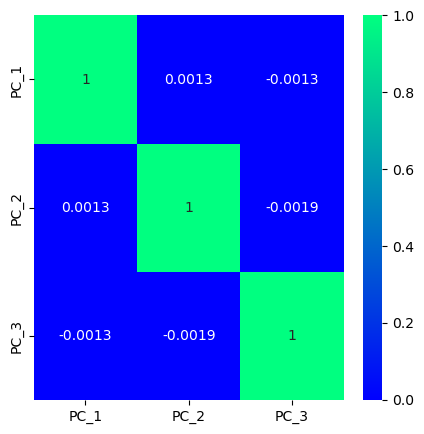

In [67]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (5,5))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

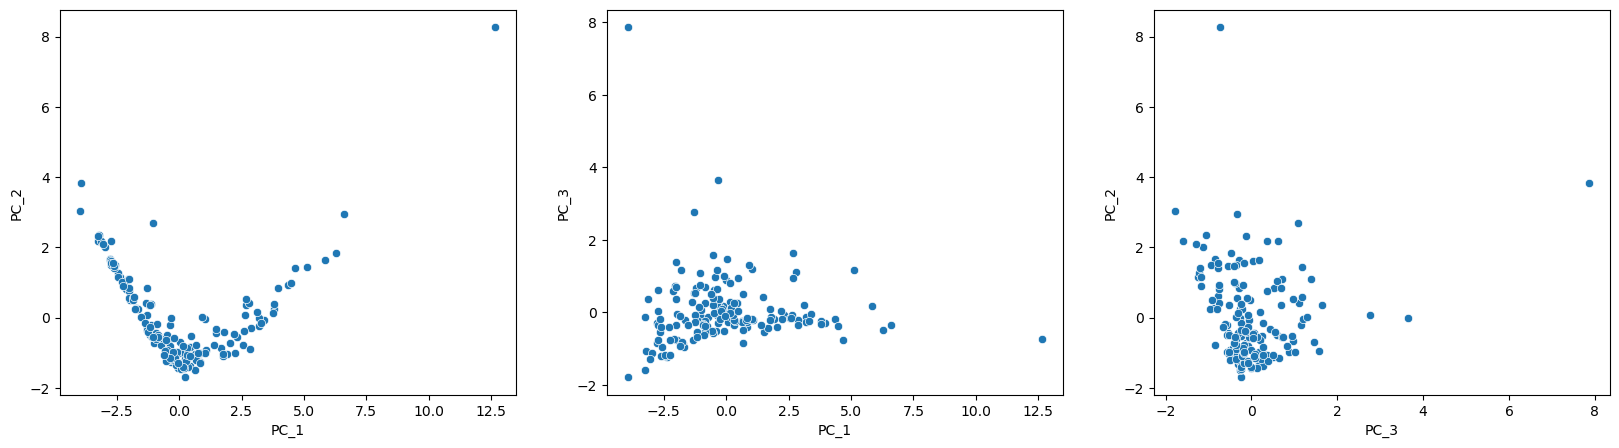

In [68]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')
plt.show()

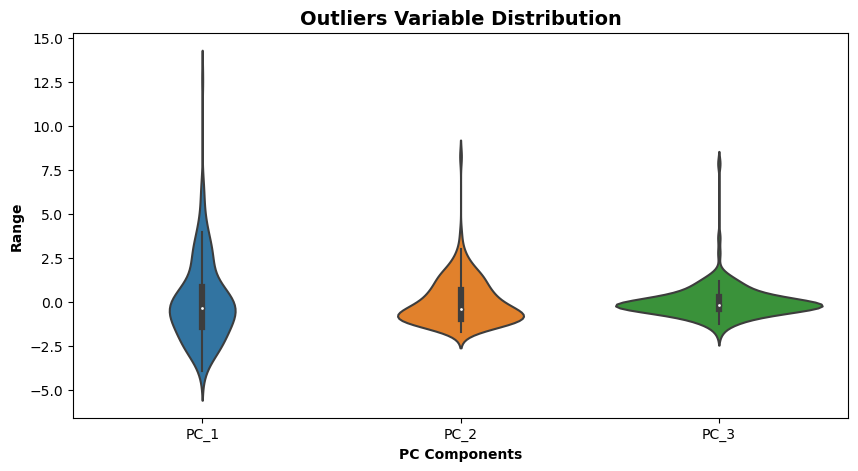

In [69]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,5]
sns.violinplot(data = df_pca_final[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [70]:
# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

In [71]:
# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

In [72]:
# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

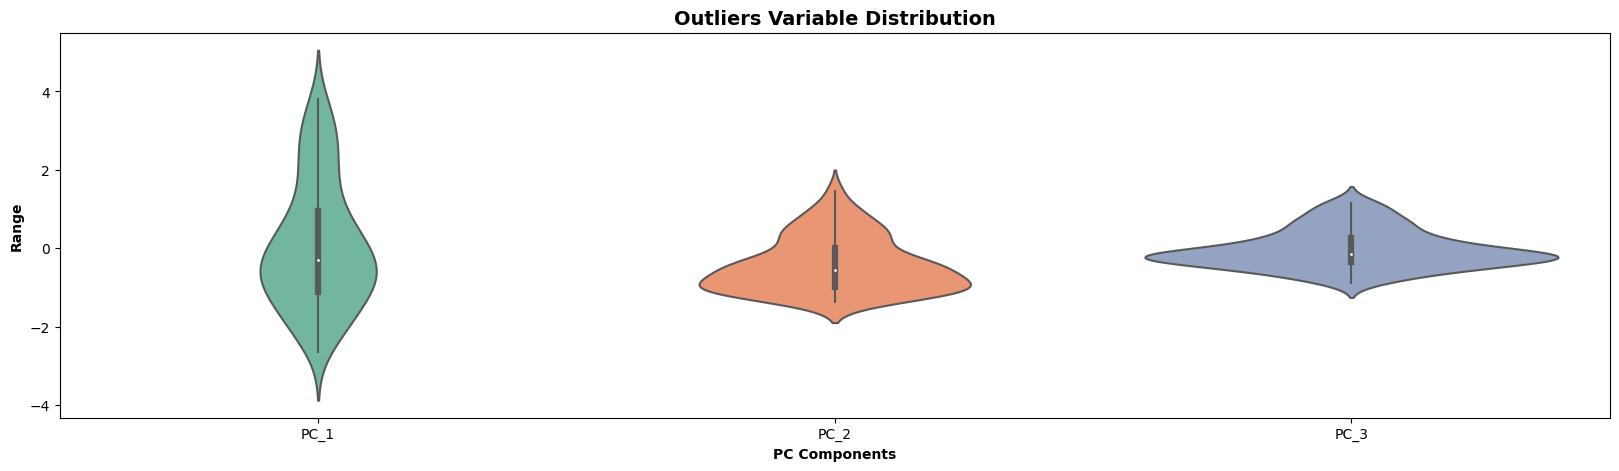

In [73]:
# Plot after Outlier removal 

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [20,5]
sns.violinplot(data = df_pca_final[outliers], orient="v", palette="Set2" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [74]:
# Reindexing the df after outlier removal

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

country      PC_1      PC_2      PC_3
0  Afghanistan         -2.637442  1.469038 -0.541359
1  Algeria             -0.457626 -0.673301  0.961867
2  Antigua and Barbuda  0.649849 -1.024374 -0.250103
3  Armenia             -0.332692 -1.274517  0.176636
4  Australia            3.180362 -0.250785 -0.116877

In [75]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [76]:
# Hopkins score
Hopkins_score=round(hopkins(df_pca_final_data),2)

In [77]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.78 is a good Hopkins score for Clustering.


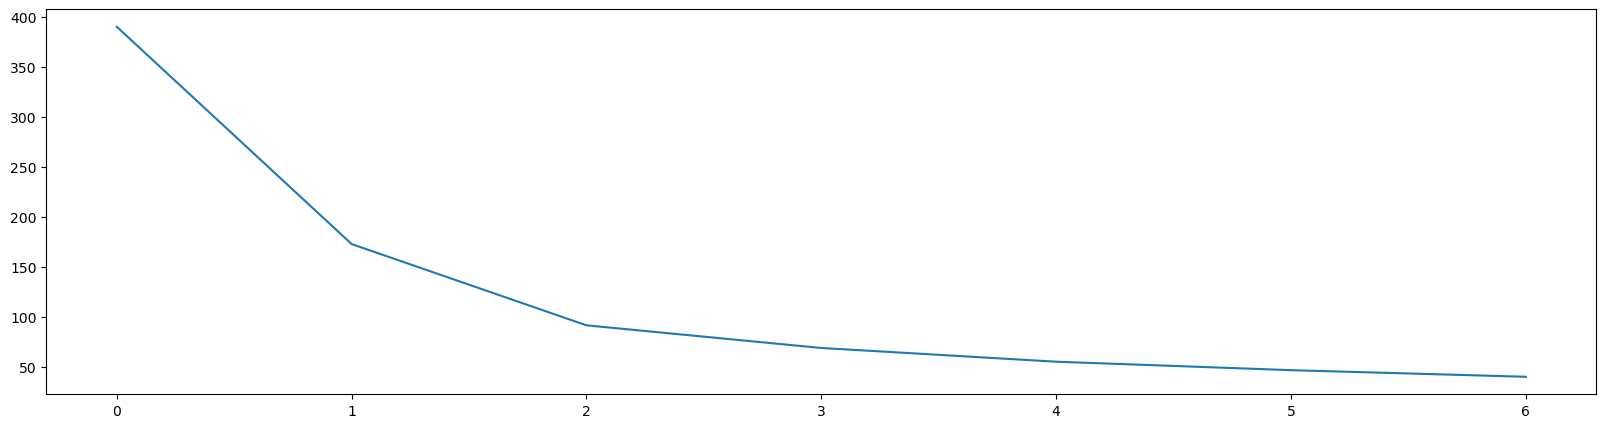

In [78]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

In [79]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4873400103541442
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.39873565683671486
For n_clusters=5, the silhouette score is 0.36170980333920083
For n_clusters=6, the silhouette score is 0.3660371654430614
For n_clusters=7, the silhouette score is 0.3703642483431638
For n_clusters=8, the silhouette score is 0.3752370154601889


In [80]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster4.fit(df_pca_final_data)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [81]:
# Cluster labels

cluster4.labels_

array([3, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 2, 0, 1,
       0, 0, 3, 3, 1, 2, 1, 0, 0, 0, 0, 3, 1, 0, 2, 2, 3, 3, 0, 2, 3, 1,
       0, 0, 0, 1, 2, 0, 0, 0, 3, 1, 2, 0, 2, 0, 0, 3, 2, 0, 3, 1, 3, 1,
       1, 3, 1, 1, 2, 3, 1, 0, 0, 0, 0, 3, 0, 2, 1, 3, 1, 0, 0, 0, 1, 1,
       1, 0, 3, 0, 1, 1, 2, 3, 3, 1, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 0, 3,
       0, 2, 2, 2, 1, 0, 0, 0, 3], dtype=int32)

In [82]:
# Assign the label

df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

country      PC_1      PC_2      PC_3  Cluster_Id4
0  Afghanistan         -2.637442  1.469038 -0.541359  3          
1  Algeria             -0.457626 -0.673301  0.961867  0          
2  Antigua and Barbuda  0.649849 -1.024374 -0.250103  1          
3  Armenia             -0.332692 -1.274517  0.176636  0          
4  Australia            3.180362 -0.250785 -0.116877  2

In [83]:
# Number of countries in each cluster

df_pca_final['Cluster_Id4'].value_counts()

0    48
1    29
3    23
2    19
Name: Cluster_Id4, dtype: int64

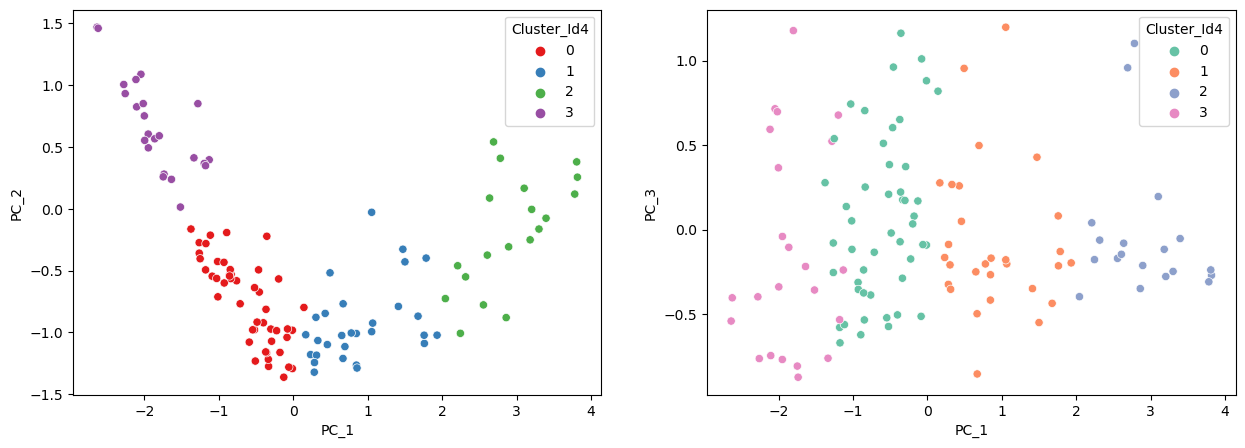

In [84]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set2",data=df_pca_final,ax=axes[1])
plt.show()

In [85]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

In [86]:
#K-means with k=5 clusters

cluster5 = KMeans(n_clusters=5, max_iter=120,random_state=70)
cluster5.fit(df_pca_final_data)

KMeans(max_iter=120, n_clusters=5, random_state=70)

In [87]:
# Cluster labels

cluster5.labels_

array([0, 1, 4, 1, 2, 2, 1, 4, 4, 3, 4, 1, 1, 3, 3, 3, 1, 1, 3, 2, 1, 1,
       1, 1, 0, 0, 4, 2, 4, 1, 1, 3, 1, 0, 4, 3, 2, 2, 0, 0, 1, 2, 0, 4,
       1, 3, 3, 4, 2, 3, 3, 1, 3, 4, 2, 1, 2, 1, 1, 0, 2, 3, 0, 4, 0, 1,
       4, 0, 1, 1, 2, 0, 1, 3, 1, 1, 3, 0, 3, 2, 4, 0, 1, 1, 1, 3, 4, 4,
       1, 1, 0, 3, 4, 4, 4, 3, 3, 4, 4, 1, 0, 1, 2, 3, 0, 3, 1, 1, 3, 0,
       1, 2, 2, 2, 1, 3, 3, 1, 0], dtype=int32)

In [88]:
# assign the label

df_pca_final['Cluster_Id'] = cluster5.labels_
df_pca_final.head()

country      PC_1      PC_2      PC_3  Cluster_Id
0  Afghanistan         -2.637442  1.469038 -0.541359  0         
1  Algeria             -0.457626 -0.673301  0.961867  1         
2  Antigua and Barbuda  0.649849 -1.024374 -0.250103  4         
3  Armenia             -0.332692 -1.274517  0.176636  1         
4  Australia            3.180362 -0.250785 -0.116877  2

In [89]:
# Number of countries in each cluster

df_pca_final['Cluster_Id'].value_counts()

1    38
3    25
4    20
0    19
2    17
Name: Cluster_Id, dtype: int64

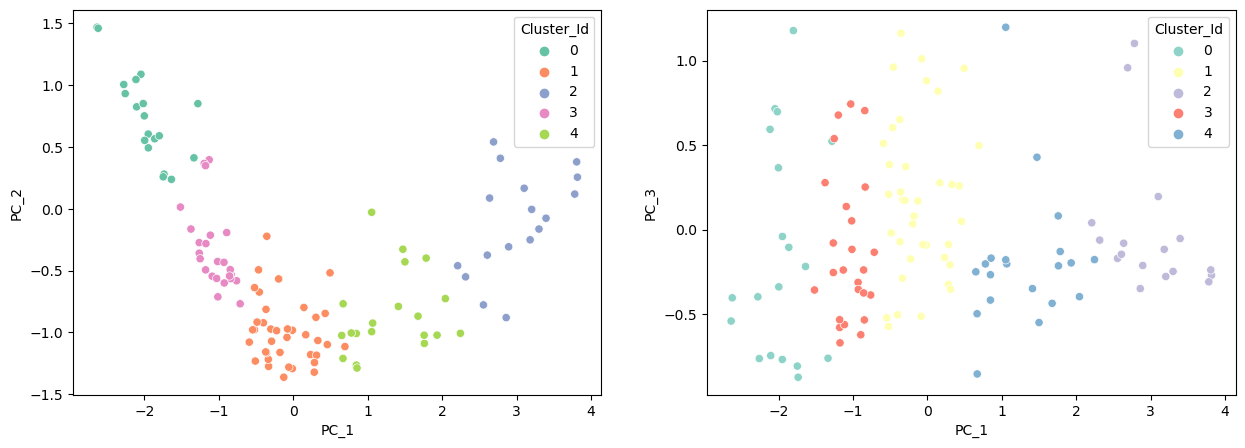

In [90]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set2",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set3",data=df_pca_final,ax=axes[1])
plt.show()

In [91]:
# Merging the df with PCA with original df

df_merge = pd.merge(ngo,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

Cluster_Id  Child_Mortality       Exports       Imports  Health_Spending  \
0  0           73.884211        688.955989    602.859789    76.761663         
1  1           18.807895        2534.693684   2579.022368   392.042053        
2  2           5.141176         16736.111765  15324.935294  3954.500588       
3  3           40.068000        970.296741    1223.062844   164.852976        
4  4           7.140000         9374.470000   9371.095000   1442.029000       

         Income  Inflation  Life_Expectancy  Total_Fertility    GDPpcapita  
0  3536.315789   10.930526  62.610526        4.705263         1583.842105   
1  12597.894737  7.486605   73.921053        2.150263         6260.000000   
2  41705.882353  2.823647   80.476471        1.776471         40911.764706  
3  5849.200000   7.707200   67.116000        3.088000         2627.280000   
4  26050.000000  1.639550   76.915000        1.740000         18835.000000

In [92]:
df_merge_col.head()

country  child_mort   exports    imports     health  income  \
0  Afghanistan          90.2        55.30     248.297    41.9174    1610     
1  Algeria              27.3        1712.64   1400.440   185.9820   12900    
2  Antigua and Barbuda  10.3        5551.00   7185.800   735.6600   19100    
3  Armenia              18.1        669.76    1458.660   141.6800   6700     
4  Australia            4.8         10276.20  10847.100  4530.8700  41400    

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0  9.44       56.2        5.82       553    0           
1  16.10      76.5        2.89       4460   1           
2  1.44       76.8        2.13       12200  4           
3  7.77       73.3        1.69       3220   1           
4  1.16       82.0        1.93       51900  2

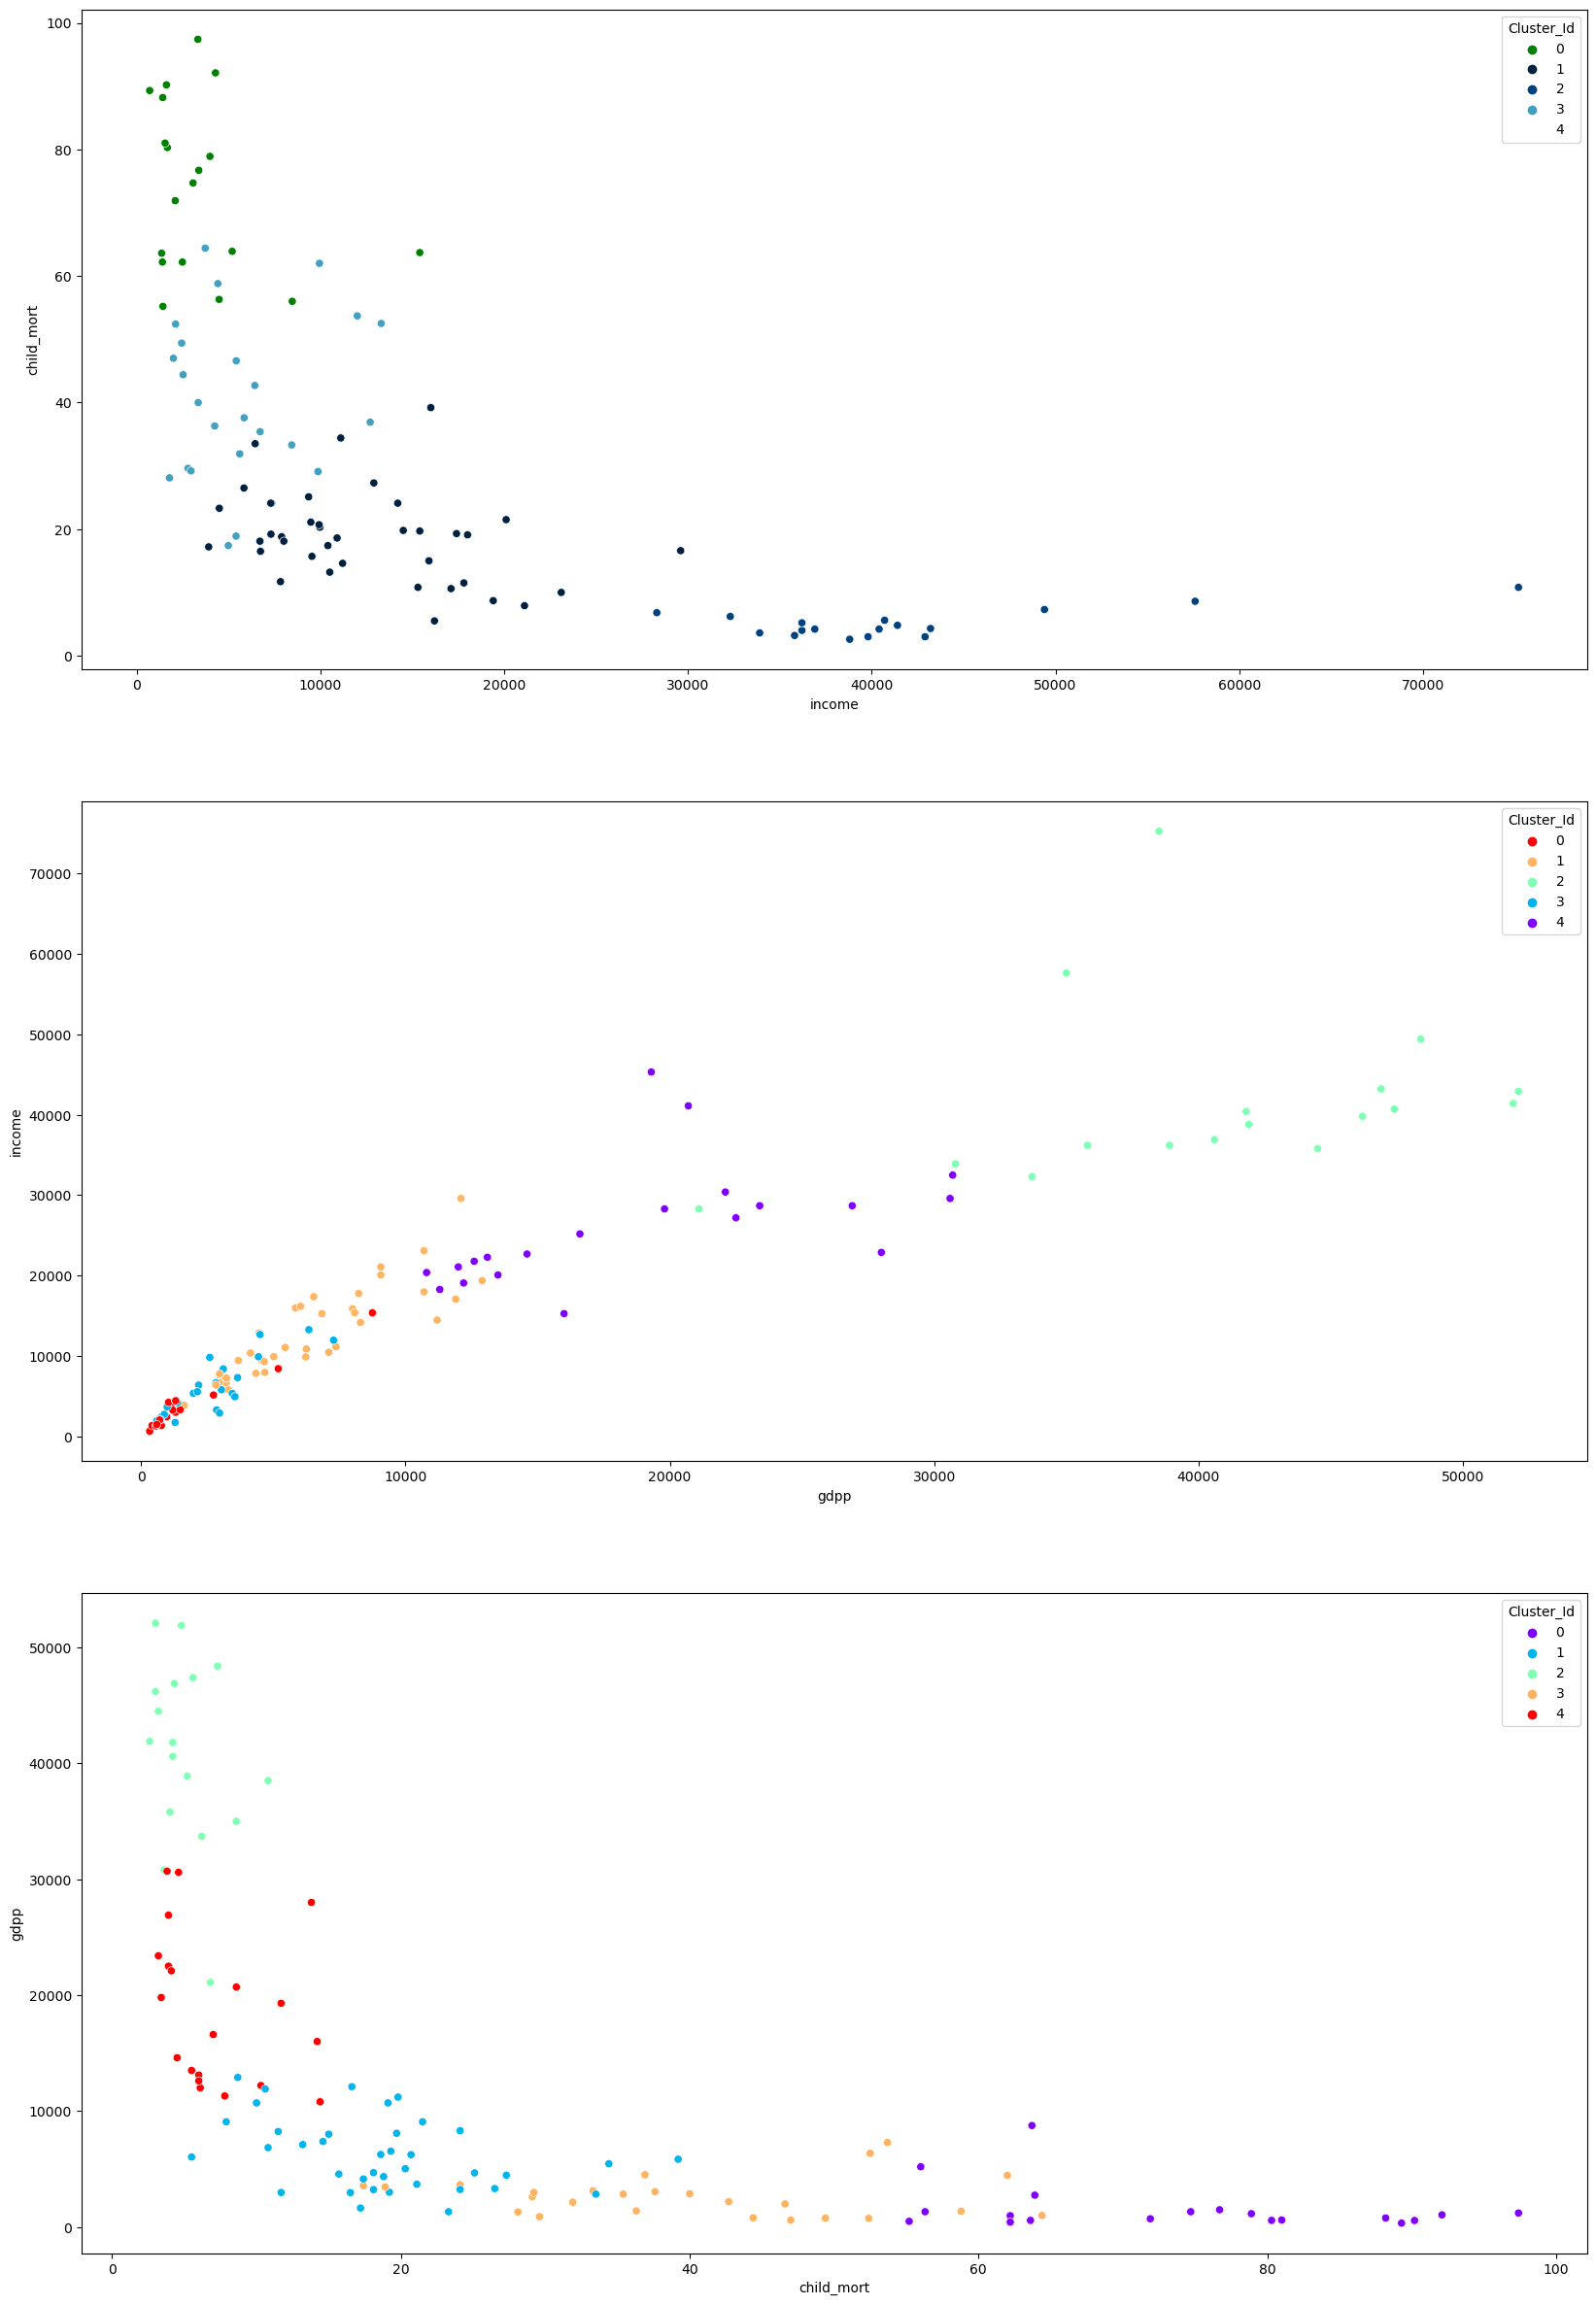

In [93]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="ocean")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="rainbow_r")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="rainbow")
plt.show()

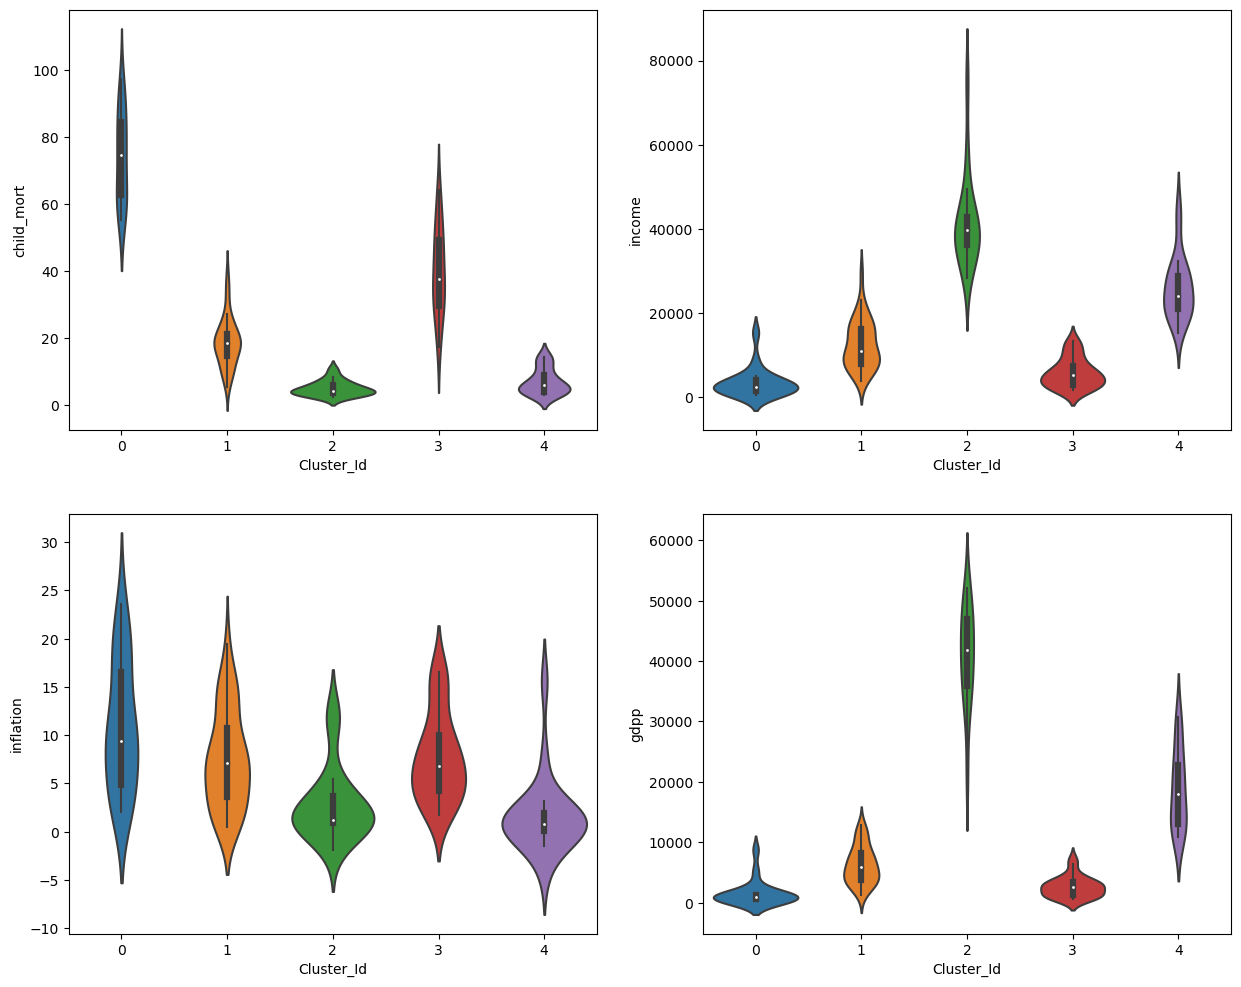

In [94]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.show()

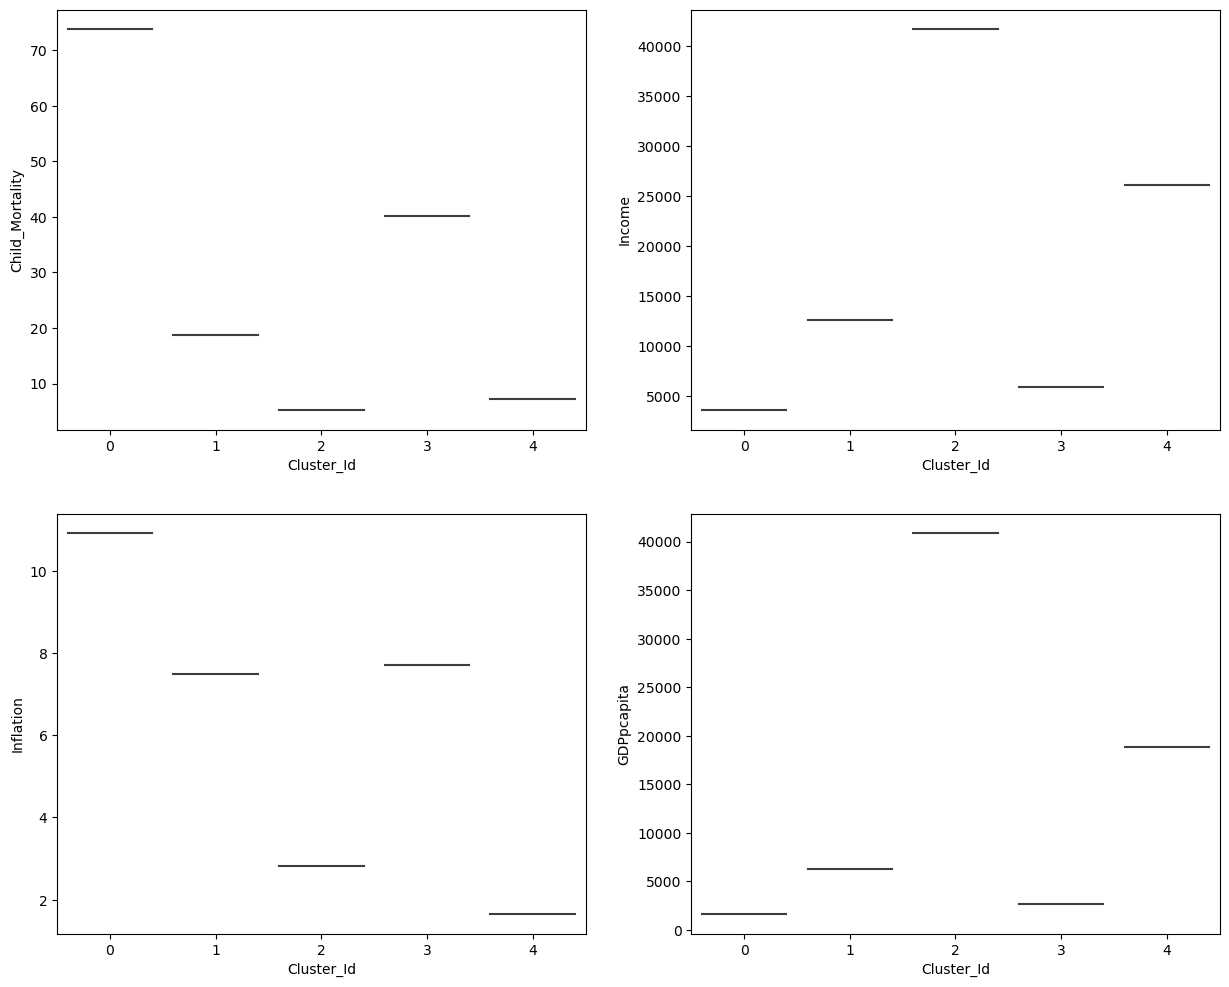

In [95]:
# Violin plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])
plt.show()

In [96]:
# List of countries in Cluster 0

df_merge_col[df_merge_col['Cluster_Id']==0]

country  child_mort    exports   imports    health  income  \
0    Afghanistan  90.2        55.3000    248.297   41.9174   1610     
24   Comoros      88.2        126.8850   397.573   34.6819   1410     
25   Congo, Rep.  63.9        2331.7400  1498.780  67.4040   5190     
33   Eritrea      55.2        23.0878    112.306   12.8212   1420     
38   Gabon        63.7        5048.7500  1653.750  306.2500  15400    
39   Gambia       80.3        133.7560   239.974   31.9778   1660     
42   Ghana        74.7        386.4500   601.290   68.3820   3060     
59   Kenya        62.2        200.1690   324.912   45.9325   2480     
62   Lao          78.9        403.5600   562.020   50.9580   3980     
64   Liberia      89.3        62.4570    302.802   38.5860   700      
67   Madagascar   62.2        103.2500   177.590   15.5701   1390     
71   Mauritania   97.4        608.4000   734.400   52.9200   3320     
77   Namibia      56.0        2480.8200  3150.330  351.8820  8460     
81   Pakistan     92.1        140.4000   201.760   22.8800   4280     
90   Rwanda       63.6        67.5600    168.900   59.1150   1350     
100  Sudan        76.7        291.5600   254.560   93.5360   3370     
104  Tanzania     71.9        131.2740   204.282   42.1902   2090     
109  Uganda       81.0        101.7450   170.170   53.6095   1540     
118  Yemen        56.3        393.0000   450.640   67.8580   4480     

     inflation  life_expec  total_fer  gdpp  Cluster_Id  
0    9.44       56.2        5.82       553   0           
24   3.87       65.9        4.75       769   0           
25   20.70      60.4        4.95       2740  0           
33   11.60      61.7        4.61       482   0           
38   16.60      62.9        4.08       8750  0           
39   4.30       65.5        5.71       562   0           
42   16.60      62.2        4.27       1310  0           
59   2.09       62.8        4.37       967   0           
62   9.20       63.8        3.15       1140  0           
64   5.47       60.8        5.02       327   0           
67   8.79       60.8        4.60       413   0           
71   18.90      68.2        4.98       1200  0           
77   3.56       58.6        3.60       5190  0           
81   10.90      65.3        3.85       1040  0           
90   2.61       64.6        4.51       563   0           
100  19.60      66.3        4.88       1480  0           
104  9.25       59.3        5.43       702   0           
109  10.60      56.8        6.15       595   0           
118  23.60      67.5        4.67       1310  0

In [97]:
# List of countries in Cluster 4

df_merge_col[df_merge_col['Cluster_Id']==4]

country  child_mort  exports  imports   health  income  \
2   Antigua and Barbuda  10.3        5551.0   7185.8   735.66   19100    
7   Bahamas              13.8        9800.0   12236.0  2209.20  22900    
8   Bahrain              8.6         14386.5  10536.3  1028.79  41100    
10  Barbados             14.2        6320.0   7792.0   1275.20  15300    
26  Croatia              5.5         5076.0   5143.5   1047.60  20100    
28  Czech Republic       3.4         13068.0  12454.2  1560.24  28300    
34  Estonia              4.5         10964.6  10030.2  880.38   22700    
43  Greece               3.9         5944.9   8258.3   2770.70  28700    
47  Hungary              6.0         10715.8  10021.5  960.23   22300    
53  Israel               4.6         10710.0  10067.4  2334.78  29600    
63  Latvia               7.8         6068.1   6226.3   754.84   18300    
66  Lithuania            6.1         7836.0   8064.0   844.80   21100    
80  Oman                 11.7        12680.1  7951.6   534.61   45300    
86  Poland               6.0         5052.6   5304.6   939.96   21800    
87  Portugal             3.9         6727.5   8415.0   2475.00  27200    
92  Seychelles           14.4        10130.4  11664.0  367.20   20400    
93  Slovak Republic      7.0         12665.8  12914.8  1459.14  25200    
94  Slovenia             3.2         15046.2  14718.6  2201.94  28700    
97  South Korea          4.1         10917.4  10210.2  1531.53  30400    
98  Spain                3.8         7828.5   8227.6   2928.78  32500    

    inflation  life_expec  total_fer   gdpp  Cluster_Id  
2   1.440      76.8        2.13       12200  4           
7  -0.393      73.8        1.86       28000  4           
8   7.440      76.0        2.16       20700  4           
10  0.321      76.7        1.78       16000  4           
26  0.821      76.3        1.55       13500  4           
28 -1.430      77.5        1.51       19800  4           
34  1.740      76.0        1.72       14600  4           
43  0.673      80.4        1.48       26900  4           
47  2.330      74.5        1.25       13100  4           
53  1.770      81.4        3.03       30600  4           
63 -0.812      73.1        1.36       11300  4           
66  2.380      73.2        1.50       12000  4           
80  15.600     76.1        2.90       19300  4           
86  1.660      76.3        1.41       12600  4           
87  0.643      79.8        1.39       22500  4           
92 -4.210      73.4        2.17       10800  4           
93  0.485      75.5        1.43       16600  4           
94 -0.987      79.5        1.57       23400  4           
97  3.160      80.1        1.23       22100  4           
98  0.160      81.9        1.37       30700  4

In [98]:
df_clus0 = df_merge_col[df_merge_col['Cluster_Id'] ==0]
df_clus0.head()

country  child_mort    exports   imports    health  income  inflation  \
0   Afghanistan  90.2        55.3000    248.297   41.9174   1610    9.44        
24  Comoros      88.2        126.8850   397.573   34.6819   1410    3.87        
25  Congo, Rep.  63.9        2331.7400  1498.780  67.4040   5190    20.70       
33  Eritrea      55.2        23.0878    112.306   12.8212   1420    11.60       
38  Gabon        63.7        5048.7500  1653.750  306.2500  15400   16.60       

    life_expec  total_fer  gdpp  Cluster_Id  
0   56.2        5.82       553   0           
24  65.9        4.75       769   0           
25  60.4        4.95       2740  0           
33  61.7        4.61       482   0           
38  62.9        4.08       8750  0

In [99]:
df_clus4 = df_merge_col[df_merge_col['Cluster_Id'] ==4]
df_clus4.head()

country  child_mort  exports  imports   health  income  \
2   Antigua and Barbuda  10.3        5551.0   7185.8   735.66   19100    
7   Bahamas              13.8        9800.0   12236.0  2209.20  22900    
8   Bahrain              8.6         14386.5  10536.3  1028.79  41100    
10  Barbados             14.2        6320.0   7792.0   1275.20  15300    
26  Croatia              5.5         5076.0   5143.5   1047.60  20100    

    inflation  life_expec  total_fer   gdpp  Cluster_Id  
2   1.440      76.8        2.13       12200  4           
7  -0.393      73.8        1.86       28000  4           
8   7.440      76.0        2.16       20700  4           
10  0.321      76.7        1.78       16000  4           
26  0.821      76.3        1.55       13500  4

In [100]:
# List of countries which need help

df_append= df_clus0.append(df_clus4)
df_append.head()

country  child_mort    exports   imports    health  income  inflation  \
0   Afghanistan  90.2        55.3000    248.297   41.9174   1610    9.44        
24  Comoros      88.2        126.8850   397.573   34.6819   1410    3.87        
25  Congo, Rep.  63.9        2331.7400  1498.780  67.4040   5190    20.70       
33  Eritrea      55.2        23.0878    112.306   12.8212   1420    11.60       
38  Gabon        63.7        5048.7500  1653.750  306.2500  15400   16.60       

    life_expec  total_fer  gdpp  Cluster_Id  
0   56.2        5.82       553   0           
24  65.9        4.75       769   0           
25  60.4        4.95       2740  0           
33  61.7        4.61       482   0           
38  62.9        4.08       8750  0

In [101]:
df_append.describe()

child_mort       exports       imports       health        income  \
count  39.000000   39.000000     39.000000     39.000000    39.000000      
mean   39.656410   5143.065738   5099.390667   776.898759   15081.794872   
std    35.153818   5030.601760   4827.360255   885.562266   12783.198033   
min    3.200000    23.087800     112.306000    12.821200    700.000000     
25%    6.000000    170.284500    313.857000    51.939000    2770.000000    
50%    14.400000   5052.600000   5143.500000   367.200000   15400.000000   
75%    73.300000   9965.200000   9218.250000   1161.400000  24050.000000   
max    97.400000   15046.200000  14718.600000  2928.780000  45300.000000   

       inflation  life_expec  total_fer          gdpp  Cluster_Id  
count  39.000000  39.000000   39.000000  39.000000     39.000000   
mean   6.165923   69.946154   3.184615   10430.589744  2.051282    
std    7.143288   7.868520    1.628858   9996.566291   2.025479    
min   -4.210000   56.200000   1.230000   327.000000    0.000000    
25%    0.747000   62.850000   1.530000   1003.500000   0.000000    
50%    3.160000   73.100000   3.030000   10800.000000  4.000000    
75%    10.020000  76.300000   4.640000   17950.000000  4.000000    
max    23.600000  81.900000   6.150000   30700.000000  4.000000

In [102]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 54.67 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = ngo[ngo['child_mort']>55]
df_final_list.shape

(47, 10)

In [103]:
df_final_list.head()

country  child_mort    exports    health   imports  income  \
0   Afghanistan   90.2        55.3000    41.9174   248.297   1610     
3   Angola        119.0       2199.1900  100.6050  1514.370  5900     
17  Benin         111.0       180.4040   31.0780   281.976   1820     
25  Burkina Faso  116.0       110.4000   38.7550   170.200   1430     
26  Burundi       93.6        20.6052    26.7960   90.552    764      

    inflation  life_expec  total_fer  gdpp  
0   9.440      56.2        5.82       553   
3   22.400     60.1        6.16       3530  
17  0.885      61.8        5.36       758   
25  6.810      57.9        5.87       575   
26  12.300     57.7        6.26       231

In [104]:
# Let's check the demographic of the resultant data again

df_final_list.describe()


child_mort       exports      health       imports        income  \
count  47.000000   47.000000     47.000000   47.000000     47.000000      
mean   93.857447   821.899913    85.743751   727.775151    3518.361702    
std    32.242908   2283.329458   126.306474  1514.707514   5239.428061    
min    55.200000   1.076920      12.821200   0.651092      609.000000     
25%    64.150000   101.515500    31.962100   185.067000    1390.000000    
50%    90.200000   180.404000    46.495000   302.802000    1870.000000    
75%    111.000000  398.280000    68.120000   545.140000    3545.000000    
max    208.000000  14671.800000  766.080000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp  
count  47.000000   47.000000   47.000000  47.000000     
mean   11.731596   59.661702   4.961489   1680.851064   
std    15.553125   6.577120    1.108271   2765.543330   
min    0.885000    32.100000   2.410000   231.000000    
25%    3.715000    57.050000   4.440000   550.000000    
50%    8.790000    60.400000   5.060000   897.000000    
75%    16.350000   63.900000   5.635000   1330.000000   
max    104.000000  71.100000   7.490000   17100.000000

In [105]:
# We observed that mean income is 3518.36 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3519]
df_final_list1.shape

(35, 10)

In [106]:
df_final_list1.head()

country  child_mort   exports   health  imports  income  inflation  \
0   Afghanistan   90.2        55.3000   41.9174  248.297  1610    9.440       
17  Benin         111.0       180.4040  31.0780  281.976  1820    0.885       
25  Burkina Faso  116.0       110.4000  38.7550  170.200  1430    6.810       
26  Burundi       93.6        20.6052   26.7960  90.552   764     12.300      
28  Cameroon      108.0       290.8200  67.2030  353.700  2660    1.910       

    life_expec  total_fer  gdpp  
0   56.2        5.82       553   
17  61.8        5.36       758   
25  57.9        5.87       575   
26  57.7        6.26       231   
28  57.3        5.11       1310

In [107]:
df_final_list1.describe()

child_mort     exports      health      imports       income  \
count  35.000000   35.000000   35.000000   35.000000    35.000000     
mean   98.720000   190.761400  56.936277   352.976029   1735.800000   
std    32.886988   159.715094  56.727776   280.167208   769.189482    
min    55.200000   20.605200   12.821200   90.552000    609.000000    
25%    75.700000   80.351500   31.512200   170.534000   1215.000000   
50%    90.500000   131.985000  41.917400   254.560000   1540.000000   
75%    112.500000  224.584500  57.857500   400.286500   2135.000000   
max    208.000000  617.320000  328.320000  1190.510000  3370.000000   

       inflation  life_expec  total_fer         gdpp  
count  35.000000  35.000000   35.000000  35.000000    
mean   8.491286   58.377143   5.252571   831.200000   
std    6.690649   6.957057    0.897743   606.557199   
min    0.885000   32.100000   3.300000   231.000000   
25%    2.790000   56.250000   4.810000   470.500000   
50%    6.390000   58.700000   5.210000   648.000000   
75%    12.200000  62.000000   5.765000   1085.000000  
max    26.500000  71.100000   7.490000   3600.000000

In [108]:
# We observed that mean gdpp is 831.2 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=832]
df_final_list2.shape

(23, 10)

In [109]:
df_final_list2.head()

country  child_mort   exports   health  imports  income  \
0   Afghanistan               90.2        55.3000   41.9174  248.297  1610     
17  Benin                     111.0       180.4040  31.0780  281.976  1820     
25  Burkina Faso              116.0       110.4000  38.7550  170.200  1430     
26  Burundi                   93.6        20.6052   26.7960  90.552   764      
31  Central African Republic  149.0       52.6280   17.7508  118.190  888      

    inflation  life_expec  total_fer  gdpp  
0   9.440      56.2        5.82       553   
17  0.885      61.8        5.36       758   
25  6.810      57.9        5.87       575   
26  12.300     57.7        6.26       231   
31  2.010      47.5        5.21       446

In [110]:
df_final_list2.sort_values(by = ['gdpp','income','child_mort'], ascending = [True, True, False],inplace=True)
df_final_list2.head()

country  child_mort   exports   health  imports  income  \
26   Burundi           93.6        20.6052   26.7960  90.552   764      
88   Liberia           89.3        62.4570   38.5860  302.802  700      
37   Congo, Dem. Rep.  116.0       137.2740  26.4194  165.664  609      
112  Niger             123.0       77.2560   17.9568  170.868  814      
132  Sierra Leone      160.0       67.0320   52.2690  137.655  1220     

     inflation  life_expec  total_fer  gdpp  
26   12.30      57.7        6.26       231   
88   5.47       60.8        5.02       327   
37   20.80      57.5        6.54       334   
112  2.55       58.8        7.49       348   
132  17.20      55.0        5.20       399

In [111]:
df_final_list2['country']

26     Burundi                 
88     Liberia                 
37     Congo, Dem. Rep.        
112    Niger                   
132    Sierra Leone            
93     Madagascar              
106    Mozambique              
31     Central African Republic
94     Malawi                  
50     Eritrea                 
150    Togo                    
64     Guinea-Bissau           
0      Afghanistan             
56     Gambia                  
126    Rwanda                  
25     Burkina Faso            
155    Uganda                  
63     Guinea                  
66     Haiti                   
147    Tanzania                
97     Mali                    
17     Benin                   
36     Comoros                 
Name: country, dtype: object

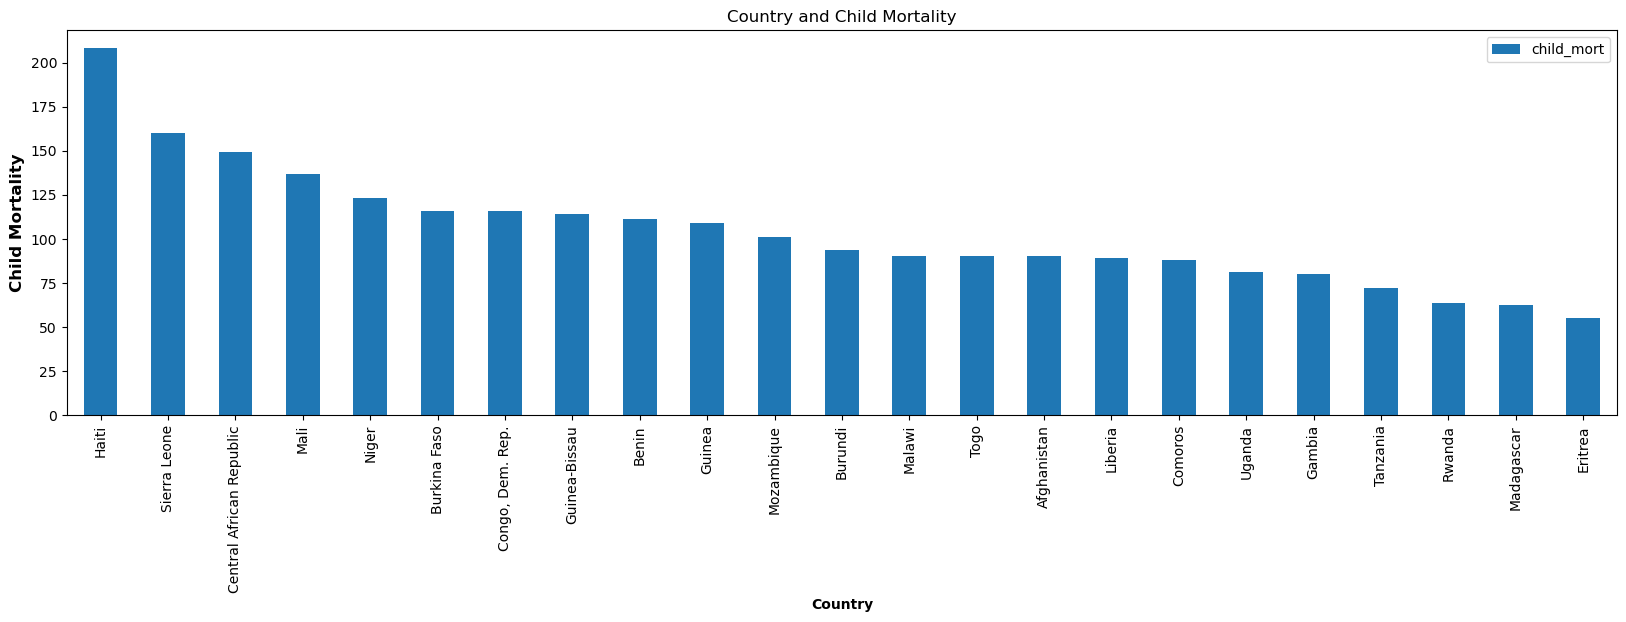

In [112]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

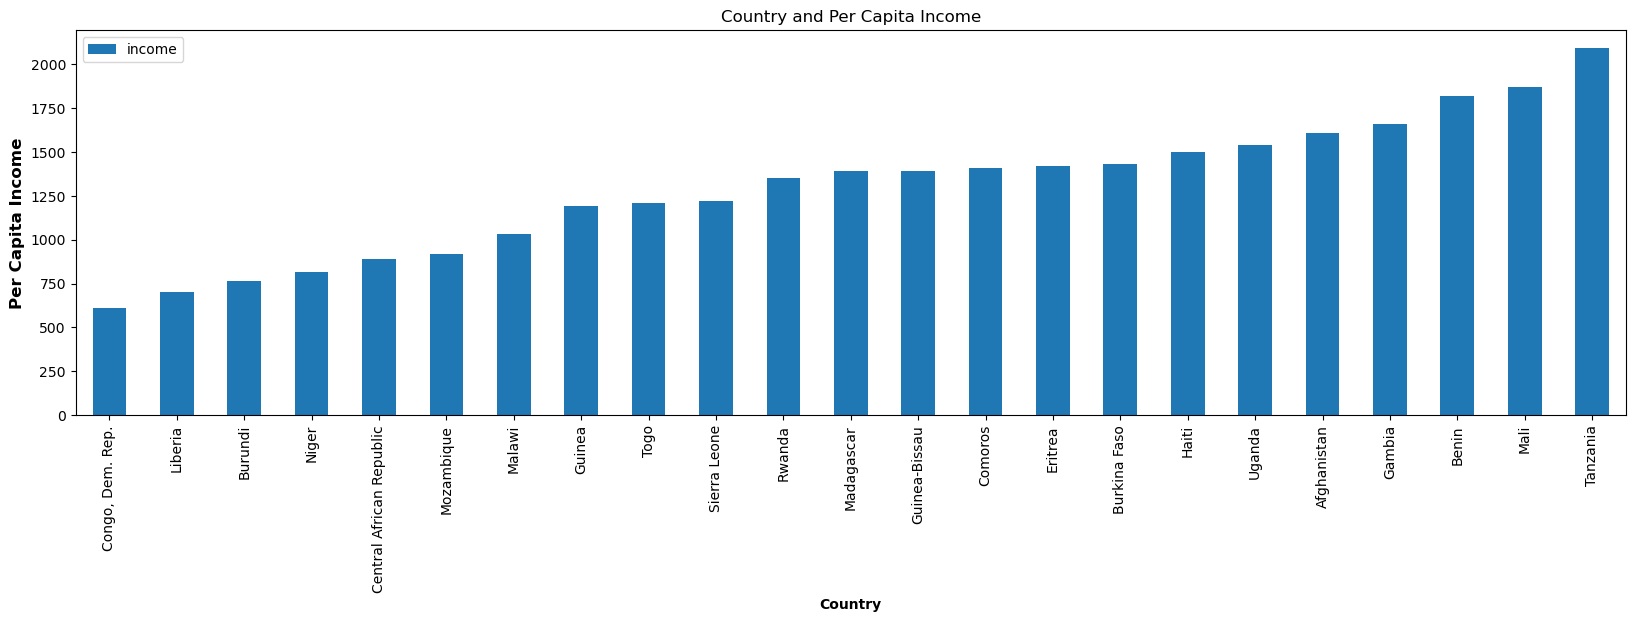

In [113]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

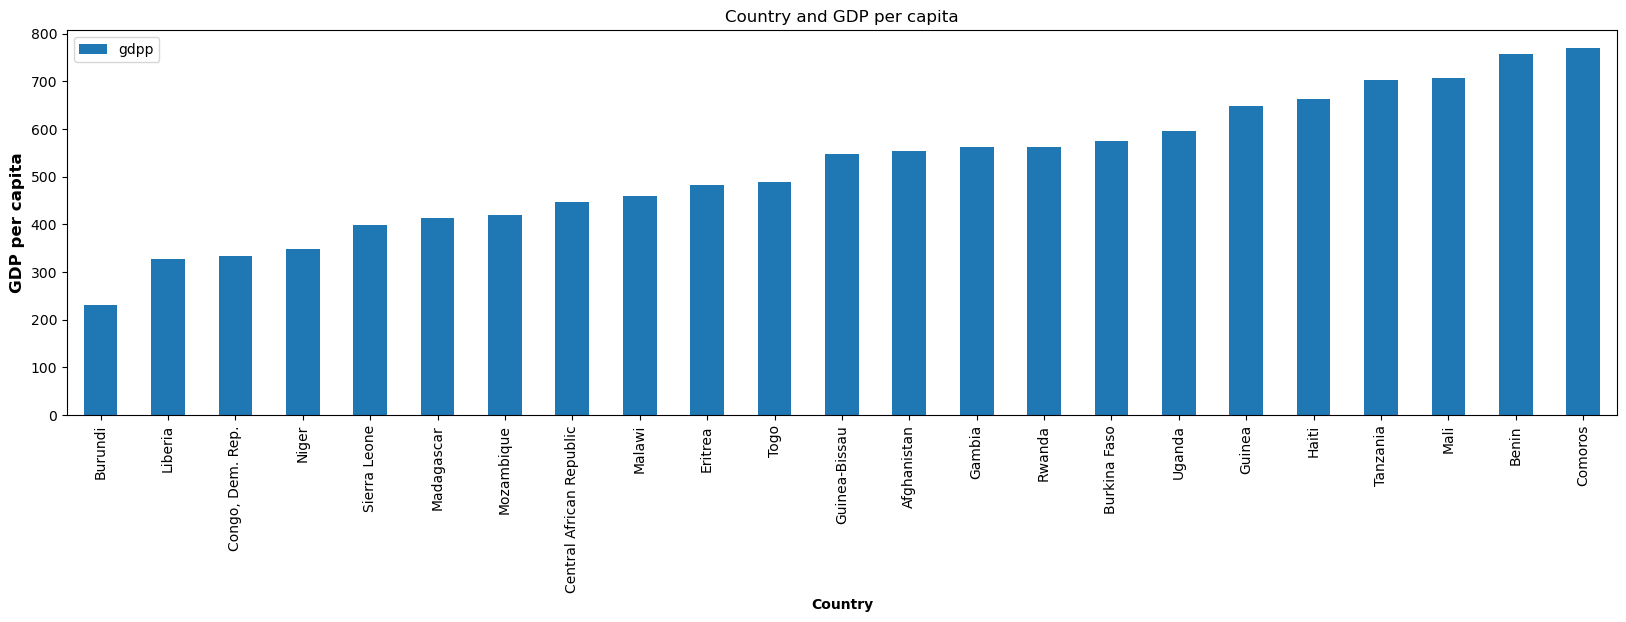

In [114]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

In [115]:
# Final countries list
df_final_list2.reset_index(drop=True).country[:5]

0    Burundi         
1    Liberia         
2    Congo, Dem. Rep.
3    Niger           
4    Sierra Leone    
Name: country, dtype: object

Resources are limited, so we selected only 5 countries for Supporting help who have high child mortality, low income & low GDP